In [ ]:
from hyperopt import STATUS_OK, fmin, tpe, Trials, hp
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

# 1번
베이지안 사용해서 XGBoost학습

In [ ]:
# (1) 검색 공간 사용 [5점]
# max_depth는 1 ~ 10, step = 1
# learning_rate는 0.02 ~ 0.3, step = default값
xgb_search_space = {'max_depth': hp.quniform('max_depth', 1, 10, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.02, 0.3),
                   }

# (2) 목적 함수 생성 [10점]
# estimator = 300으로 설정해주시고, 검색공간을 활용해서 하이퍼파라미터 넣어주세요.(max_depth과 learning_rate만 하이퍼파라미터로 지정합니다.)
# binary classification이여서 평가지표는 logloss로 설정해주세요.
# None값을 채워주시고, 설정한 이유를 설명해주세요.(옆에다가 주석 달아주세요.)
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=300, max_depth=int(search_space['max_depth']),
                            learning_rate=search_space['learning_rate'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3) # 이거 남기기

    return {'loss': -1 * np.mean(accuracy), 'status': STATUS_OK} # 이거 남기기

# (3) 베이지안 최적화 사용 [5점]
# fmin() 클래스를 이용해서 각 인자의 알맞은 값을 써주시고, 최적화된 learning_rate와 max_depth를 출력해주세요.
# algo = tpe.suggest 사용
# 평가횟수는 100번
# 시드값은 9로 설정
trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

print(' learning_rate:{0}, max_depth:{1}'.format(round(best['learning_rate'], 5),int(best['max_depth']),))

100%|██████████| 100/100 [01:08<00:00,  1.46trial/s, best loss: -0.9736406413384455]
best: {'learning_rate': 0.19360649319258083, 'max_depth': 1.0}
 learning_rate:0.19361, max_depth:1


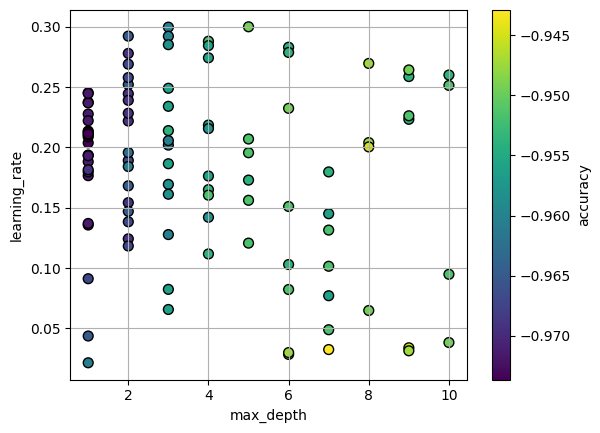

[0]	validation_0-logloss:0.56473	validation_1-logloss:0.59857
[1]	validation_0-logloss:0.47093	validation_1-logloss:0.52803
[2]	validation_0-logloss:0.40123	validation_1-logloss:0.48345
[3]	validation_0-logloss:0.34509	validation_1-logloss:0.44030
[4]	validation_0-logloss:0.30361	validation_1-logloss:0.40358
[5]	validation_0-logloss:0.26906	validation_1-logloss:0.37949
[6]	validation_0-logloss:0.24141	validation_1-logloss:0.36829
[7]	validation_0-logloss:0.21843	validation_1-logloss:0.35585
[8]	validation_0-logloss:0.20003	validation_1-logloss:0.33639
[9]	validation_0-logloss:0.18454	validation_1-logloss:0.33599
[10]	validation_0-logloss:0.17145	validation_1-logloss:0.33583
[11]	validation_0-logloss:0.16026	validation_1-logloss:0.33909
[12]	validation_0-logloss:0.15077	validation_1-logloss:0.32777
[13]	validation_0-logloss:0.14197	validation_1-logloss:0.31834
[14]	validation_0-logloss:0.13452	validation_1-logloss:0.32193
[15]	validation_0-logloss:0.12806	validation_1-logloss:0.31216
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:0.07651	validation_1-logloss:0.27085
[31]	validation_0-logloss:0.07471	validation_1-logloss:0.27211
[32]	validation_0-logloss:0.07292	validation_1-logloss:0.26800
[33]	validation_0-logloss:0.07129	validation_1-logloss:0.26676
[34]	validation_0-logloss:0.06965	validation_1-logloss:0.26655
[35]	validation_0-logloss:0.06820	validation_1-logloss:0.27035
[36]	validation_0-logloss:0.06677	validation_1-logloss:0.26703
[37]	validation_0-logloss:0.06539	validation_1-logloss:0.26652
[38]	validation_0-logloss:0.06406	validation_1-logloss:0.26612
[39]	validation_0-logloss:0.06286	validation_1-logloss:0.26485
[40]	validation_0-logloss:0.06170	validation_1-logloss:0.26090
[41]	validation_0-logloss:0.06058	validation_1-logloss:0.26219
[42]	validation_0-logloss:0.05955	validation_1-logloss:0.26167
[43]	validation_0-logloss:0.05846	validation_1-logloss:0.26162
[44]	validation_0-logloss:0.05746	validation_1-logloss:0.26059
[45]	validation_0-logloss:0.05650	validation_1-logloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.19360649319258083,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# (4) max_depth와 learning_rate에 따른 loss(accuracy)값 변화 산점도로 살펴보기(matplotlib만 사용해주세요.) (10)
# 출력한 그래프에 맞춰서 코드 짜주시면 됩니다.
df = pd.DataFrame({'max_depth': trial_val.vals['max_depth'], 'learning_rate' : trial_val.vals['learning_rate'], 'losses' : [loss_dict['loss'] for loss_dict in trial_val.results]})

plt.scatter(df['max_depth'], df['learning_rate'], c = df['losses'], cmap = 'viridis', marker = 'o', edgecolors = 'k', s = 50)
plt.colorbar(label = 'accuracy')
plt.xlabel('max_depth')
plt.ylabel('learning_rate')
plt.grid(True)
plt.show()

# (5) 최적의 하이퍼파라미터로 학습 (5)
# XGBoost 클래스를 만들어주시고, 위에서 찾은 최적의 하이퍼파라미터값으로 설정해주세요.
# eval_set는 훈련데이터와 검증데이터로 설정해주세요.
# 조기 중단 값은 10으로 설정해주세요.
# 평가지표는 logloss 설정해주세요.
xgb_wrapper = XGBClassifier(n_estimators=300,
                            learning_rate=best['learning_rate'],
                            max_depth=int(best['max_depth']),
                           )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric='logloss',
                eval_set=evals, verbose=True)



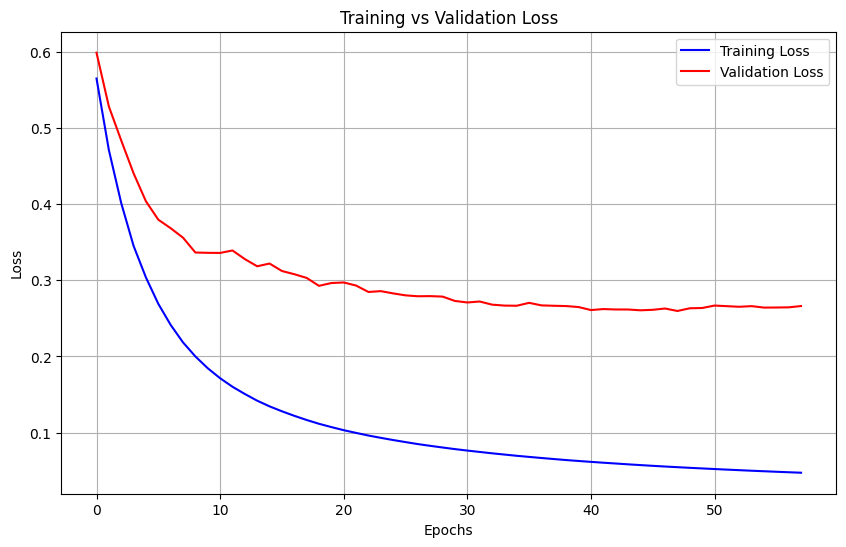

In [ ]:
# (6) 학습 데이터 손실함수와 검증 데이터의 손실함수를 비교(matplotlib만 사용해주세요.) [20점]
# 출력한 그래프에 맞춰서 코드 짜주시면 됩니다.

history = xgb_wrapper.evals_result() # 학습/검증의 데이터가 나온다.(이거 남기기)

train_loss = history['validation_0']['logloss'] # 학습 데이터 손실함수
val_loss = history['validation_1']['logloss'] # 검증 데이터 손실함수

plt.figure(figsize=(10, 6))
epochs = len(train_loss)
x_axis = np.arange(0, epochs)

plt.plot(x_axis, train_loss, label='Training Loss', c='b')
plt.plot(x_axis, val_loss, label='Validation Loss', c='r')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. 스태킹

In [6]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

mnist = fetch_openml(name = 'mnist_784')

X_features, y_labels = mnist.data, mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [4]:
# (1) MNIST데이터는 총 70,000장입니다.
# 훈련: 50,000, 검증: 10,000, 테스트 : 10,000개로 나누어주시고, 데이터 종류마다 label비율을 0.2로 맞춰주세요.

X_train, X_temp, y_train, y_temp = train_test_split(X_features, y_labels, test_size = 20000, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 10000, random_state = 42)

# (2) 로지스틱 회귀, k-최근접 이웃, 랜덤포레스트 인스턴스 생성해주세요.(하이퍼파라미터는 마음대로 설정해주세요.)
knn_clf = KNeighborsClassifier(n_neighbors = 4)
rf_clf = RandomForestClassifier(n_estimators = 200)
lr_clf = LogisticRegression()

# (3) 위에서 생성한 분류기로 voting방법을 사용해서 앙상블로 연결해보시고, 테스트 세트로 확인해보세요.
# 각 분류기와 비교해서 성능이 얼마나 향상되는지 주석으로 말씀해주세요.
classifiers = [knn_clf, rf_clf, lr_clf]

# 각 분류기마다 정확도 출력

accuracy = []
for index ,classifier in enumerate(classifiers):
  classifier.fit(X_train, y_train)
  prediction = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print(f'{class_name} 정확도 : {accuracy_score(prediction, y_test)}')

# voting 사용
vo_clf = VotingClassifier(estimators = [('LR',lr_clf), ('KNN', knn_clf), ('RF',rf_clf)], voting = 'soft')

vo_clf.fit(X_train, y_train)
prediction = vo_clf.predict(X_test)
print('정확도 : ', accuracy_score(y_test,prediction)) # 0.02% 좋아졌다.

KNeighborsClassifier 정확도 : 0.9672
RandomForestClassifier 정확도 : 0.968


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 정확도 : 0.9177


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도 :  0.9699


In [9]:
# (4) 문제의 각 분류기를 실행해서 검증 세트에서 예측을 만들고 그 결과로 새로운 훈련 세트를 만들어보세요. 각 훈련 샘플은 하나의 이미지에 대한 전체 분류기의 예측을 담은 벡터고 타깃은 이미지의 클래스입니다.
# 새로운 훈련 세트에 분류기 하나를 훈련시켜 보세요.(RandomForest로 문제에서 주어질 것 입니다.)

X_val_predictions = np.empty((len(X_val), len(classifiers)), dtype=np.float32)

for index, estimator in enumerate(classifiers):
    X_val_predictions[:, index] = estimator.predict(X_val)
print(X_val_predictions)

rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42) # 남기기

# (5) 생성한 훈련세트로 rnd_forest_blender를 학습시켜주세요.
rnd_forest_blender.fit(X_val_predictions, y_val)

In [17]:
# (6) oob score를 출력해주세요.(oob score는 앙상블 모델에 대한 성능을 측정합니다.)
rnd_forest_blender.oob_score_

0.9707

In [20]:
# (7) 이제 블렌더(메타 모델)을 훈련시켰으니, 테스트 세트에 앙상블을 평가해보고 정확도를 출력해주세요.
X_test_predictions = np.empty((len(X_test), len(classifiers)), dtype = np.float32)

for index, classifier in enumerate(classifiers):
  X_test_predictions[:, index] = estimator.predict(X_test)
y_pred = rnd_forest_blender.predict(X_test_predictions)

rnd_forest_blender = RandomForestClassifier(n_estimators = 200, oob_score = True,random_state = 42)
rnd_forest_blender.fit(X_val_predictions, y_val)

accuracy_score(y_test, y_pred)

-----

# 3번  
# 1. 데이터 전처리

In [ ]:
# Environment setting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline

1. creditcard.csv 파일을 'card_df'라는 이름의 데이터프레임으로 읽어주세요

In [ ]:
card_df = pd.read_csv('creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


2. card_df의 각 컬럼들에 대하여 결측치와 dtype을 확인해주세요

In [ ]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

3. 본 실습의 목적은 주어진 컬럼들로 'Class (정상거래 or 사기거래)'를 예측하는 것입니다. 위 데이터의 'Class' 컬럼의 분포를 확인하고, 각 클래스가 어떤 거래를 의미하는지 적어주세요.

In [ ]:
# 'Class' 컬럼 분포 확인
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

답) 클래스 0이 정상거래이고, 클래스 1이 사기거래이다.

4. card_df에서 class 예측에 필요없는 컬럼인 'Time' 컬럼을 삭제해주세요.

In [ ]:
card_df.drop('Time',axis=1, inplace = True)

5. label 데이터와 feature 데이터로 나눈 후, 학습과 테스트 데이터로 분할해주세요. (단, test_size = 0.3,random_state=0, 클래스 0과 1의 분포가 학습 및 데스트 데이터에 동일하도록 분할)

In [ ]:
X = card_df.iloc[:,:-1]
y = card_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

# 2. 하이퍼 파라미터 튜닝

베이지안 최적화를 기반으로 하는 HyperOpt를 사용한 하이퍼 파라미터 튜닝은 다음의 단계를 거친다.<br>
1. 검색 공간 설정<br>
2. 목적 함수 설정<br>
3. 최적의 파라미터 추출<br>
4. 최적의 파라미터로 학습 및 평가<br><br>
위 순서로 과제를 진행해보자.

### 0. 다음의 코드를 실행해 주세요.

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

lgbm_clf = LGBMClassifier(n_estimators=1000)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=300, eval_metric="auc", eval_set=eval_set,verbose=False)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8919


위 코드를 통해 튜닝 전 ROC AUC가 0.8919임을 알 수 있다.(문제 1에서 확인했듯이 레이블의 분포가 불균형하므로 모든 평가 지표는 accuracy가 아닌 ROC AUC를 사용한다.)

### 1. 검색 공간을 설정해보자.<br>
HyperOpt의 hp 모듈은 입력값의 검색 공간을 다양하게 설정할 수 있도록 여러 함수를 제공한다.(책 257쪽 참고)<br>
LightGBM의 경우 주로 num_leaves, max_depth, min_childe_samples를 통해 하이퍼 파라미터를 튜닝한다.<br>
< 과제 ><br>
a.num_leaves: 64부터 128까지 1의 간격을 가지고 설정<br>
b.max_depth: 128부터 256까지 1의 간격을 가지고 설정<br>
c.min_child_samples: 64부터 128까지 2의 간격을 가지고 설정<br>
d.learning_rate: 0.1부터 0.2까지 로그 변환된 값이 정규 분포 형태를 가지도록 설정

In [ ]:
from hyperopt import hp
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 64, 128, 1),
                     'max_depth': hp.quniform('max_depth', 128, 256, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 64, 128, 1),
                     'learning_rate': hp.loguniform('learning_rate', np.log(0.1), np.log(0.2))
                    }

### 2. 목적함수를 설정해보자.<br>
탐색 시간을 줄이기 위해 목적함수의 모델에서는 n_estimator을 200으로 줄인다.<br>
< 과제 ><br>
a.n_estimator=200 <br>
b.roc_auc_list에 StratifiedKFold에서 나오는 ROC AUC 값을 저장, n_splits=3<br>
c.early_stopping_rounds=50<br>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=200, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']),
                               learning_rate=search_space['learning_rate'])
    roc_auc_list = []
    skf = StratifiedKFold(n_splits=3)

    for tr_index, val_index in skf.split(X_train,y_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    return -1*np.mean(roc_auc_list)

### 3. 최적의 파라미터를 추출해보자.<br>
fmin()함수를 호출해보자. 이 함수는 목적 함수가 최소값을 가지는 파라미터를 딕셔너리 형태로 추출해준다.<br>
< 과제 ><br>
a.max_evals=50 <br>

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[1]	training's auc: 0.999139	training's binary_logloss: 0.014682	valid_1's auc: 0.944557	valid_1's binary_logloss: 0.0180662
[2]	training's auc: 0.955905	training's binary_logloss: 0.00962237	valid_1's auc: 0.840363	valid_1's binary_logloss: 0.0148117
[3]	training's auc: 0.964677	training's binary_logloss: 0.00872834	valid_1's auc: 0.844632	valid_1's binary_logloss: 0.0143565
[4]	training's auc: 0.977557	training's binary_logloss: 0.00803941	valid_1's auc: 0.844734	valid_1's binary_logloss: 0.0141825
[5]	training's auc: 0.982123	training's binary_logloss: 0.00721585	valid_1's auc: 0.864424	valid_1's binary_logloss: 0.0139223
[6]	training's auc: 0.986607	training's binary_logloss: 0.00654771	valid_1's auc: 0.877234	valid_1's binary_logloss: 0.013668
[7]	training's auc: 0.982396	training's binary_logloss: 0.00536573	valid_1's auc: 0.883412	valid_1's binary_logloss: 0.0124952
[8]	training's auc: 0.990816	training's binary_logloss: 0.00404383	valid_1's auc: 0.884634	valid_1's binary_loglos

[3]	training's auc: 0.929553	training's binary_logloss: 0.0204002	valid_1's auc: 0.816523	valid_1's binary_logloss: 0.0265192
[4]	training's auc: 0.860719	training's binary_logloss: 0.0198529	valid_1's auc: 0.687113	valid_1's binary_logloss: 0.0283608
[5]	training's auc: 0.84322	training's binary_logloss: 0.0452206	valid_1's auc: 0.674212	valid_1's binary_logloss: 0.0535531
[6]	training's auc: 0.708901	training's binary_logloss: 0.0272372	valid_1's auc: 0.560774	valid_1's binary_logloss: 0.0359285
[7]	training's auc: 0.721939	training's binary_logloss: 0.0304718	valid_1's auc: 0.596178	valid_1's binary_logloss: 0.0381707
[8]	training's auc: 0.761075	training's binary_logloss: 0.0280311	valid_1's auc: 0.603428	valid_1's binary_logloss: 0.0414616
[9]	training's auc: 0.765628	training's binary_logloss: 0.0181135	valid_1's auc: 0.612052	valid_1's binary_logloss: 0.0300075
[10]	training's auc: 0.804785	training's binary_logloss: 0.0220457	valid_1's auc: 0.655639	valid_1's binary_logloss: 0.

[5]	training's auc: 0.990412	training's binary_logloss: 0.0314706	valid_1's auc: 0.883707	valid_1's binary_logloss: 0.0370287
[6]	training's auc: 0.585331	training's binary_logloss: 0.0238034	valid_1's auc: 0.561964	valid_1's binary_logloss: 0.0234534
[7]	training's auc: 0.969168	training's binary_logloss: 0.00771473	valid_1's auc: 0.865717	valid_1's binary_logloss: 0.0113854
[8]	training's auc: 0.969242	training's binary_logloss: 0.00660634	valid_1's auc: 0.866319	valid_1's binary_logloss: 0.0103158
[9]	training's auc: 0.968475	training's binary_logloss: 0.00657585	valid_1's auc: 0.872439	valid_1's binary_logloss: 0.0101098
[10]	training's auc: 0.969352	training's binary_logloss: 0.00551504	valid_1's auc: 0.881196	valid_1's binary_logloss: 0.0086919
[11]	training's auc: 0.969399	training's binary_logloss: 0.00513821	valid_1's auc: 0.886775	valid_1's binary_logloss: 0.00853545
[12]	training's auc: 0.96944	training's binary_logloss: 0.00480004	valid_1's auc: 0.888327	valid_1's binary_lo

[7]	training's auc: 0.999832	training's binary_logloss: 0.0052467	valid_1's auc: 0.943721	valid_1's binary_logloss: 0.0102105
[8]	training's auc: 0.999886	training's binary_logloss: 0.00487704	valid_1's auc: 0.945802	valid_1's binary_logloss: 0.010004
[9]	training's auc: 0.99992	training's binary_logloss: 0.00454085	valid_1's auc: 0.943939	valid_1's binary_logloss: 0.00994056
[10]	training's auc: 0.99994	training's binary_logloss: 0.00415923	valid_1's auc: 0.926851	valid_1's binary_logloss: 0.00980087
[11]	training's auc: 0.99995	training's binary_logloss: 0.00398232	valid_1's auc: 0.927467	valid_1's binary_logloss: 0.00966675
[12]	training's auc: 0.999958	training's binary_logloss: 0.00366736	valid_1's auc: 0.92667	valid_1's binary_logloss: 0.0092262
[13]	training's auc: 0.999962	training's binary_logloss: 0.0031574	valid_1's auc: 0.918284	valid_1's binary_logloss: 0.00830532
[14]	training's auc: 0.995618	training's binary_logloss: 0.0023383	valid_1's auc: 0.91922	valid_1's binary_log

[9]	training's auc: 0.770394	training's binary_logloss: 0.017497	valid_1's auc: 0.707225	valid_1's binary_logloss: 0.021707
[10]	training's auc: 0.92928	training's binary_logloss: 0.035656	valid_1's auc: 0.878817	valid_1's binary_logloss: 0.0441569
[11]	training's auc: 0.921227	training's binary_logloss: 0.0214117	valid_1's auc: 0.87056	valid_1's binary_logloss: 0.0293423
[12]	training's auc: 0.920998	training's binary_logloss: 0.0168142	valid_1's auc: 0.853965	valid_1's binary_logloss: 0.0246955
[13]	training's auc: 0.908476	training's binary_logloss: 0.0126475	valid_1's auc: 0.854948	valid_1's binary_logloss: 0.0181666
[14]	training's auc: 0.91643	training's binary_logloss: 0.0155018	valid_1's auc: 0.853173	valid_1's binary_logloss: 0.0214855
[15]	training's auc: 0.917086	training's binary_logloss: 0.0119166	valid_1's auc: 0.852911	valid_1's binary_logloss: 0.0190026
[16]	training's auc: 0.921382	training's binary_logloss: 0.010144	valid_1's auc: 0.852056	valid_1's binary_logloss: 0.

[11]	training's auc: 0.886569	training's binary_logloss: 0.00961454	valid_1's auc: 0.734377	valid_1's binary_logloss: 0.0176438
[12]	training's auc: 0.886599	training's binary_logloss: 0.00934305	valid_1's auc: 0.73431	valid_1's binary_logloss: 0.0174853
[13]	training's auc: 0.886615	training's binary_logloss: 0.00916629	valid_1's auc: 0.742682	valid_1's binary_logloss: 0.0173693
[14]	training's auc: 0.886628	training's binary_logloss: 0.00901593	valid_1's auc: 0.751446	valid_1's binary_logloss: 0.0172268
[15]	training's auc: 0.886637	training's binary_logloss: 0.00884806	valid_1's auc: 0.751899	valid_1's binary_logloss: 0.0170625
[16]	training's auc: 0.886686	training's binary_logloss: 0.00878665	valid_1's auc: 0.752398	valid_1's binary_logloss: 0.0169042
[17]	training's auc: 0.886706	training's binary_logloss: 0.00878943	valid_1's auc: 0.751636	valid_1's binary_logloss: 0.0170223
[18]	training's auc: 0.890985	training's binary_logloss: 0.00915369	valid_1's auc: 0.751647	valid_1's bin

[13]	training's auc: 0.999391	training's binary_logloss: 0.0184511	valid_1's auc: 0.93009	valid_1's binary_logloss: 0.0297405
[14]	training's auc: 0.83418	training's binary_logloss: 0.0122736	valid_1's auc: 0.764894	valid_1's binary_logloss: 0.0222771
[15]	training's auc: 0.834044	training's binary_logloss: 0.0215737	valid_1's auc: 0.765242	valid_1's binary_logloss: 0.0296471
[16]	training's auc: 0.829889	training's binary_logloss: 0.017448	valid_1's auc: 0.773195	valid_1's binary_logloss: 0.0280023
[17]	training's auc: 0.829354	training's binary_logloss: 0.0388501	valid_1's auc: 0.76362	valid_1's binary_logloss: 0.0524134
[18]	training's auc: 0.821371	training's binary_logloss: 0.0178222	valid_1's auc: 0.764712	valid_1's binary_logloss: 0.0301771
[19]	training's auc: 0.821237	training's binary_logloss: 0.0284646	valid_1's auc: 0.765039	valid_1's binary_logloss: 0.0402667
[20]	training's auc: 0.808447	training's binary_logloss: 0.0201458	valid_1's auc: 0.749539	valid_1's binary_logloss

[15]	training's auc: 0.796	training's binary_logloss: 0.0367814	valid_1's auc: 0.686924	valid_1's binary_logloss: 0.040834
[16]	training's auc: 0.783169	training's binary_logloss: 0.0389615	valid_1's auc: 0.687048	valid_1's binary_logloss: 0.0554567
[17]	training's auc: 0.783108	training's binary_logloss: 0.0367141	valid_1's auc: 0.686715	valid_1's binary_logloss: 0.0454469
[18]	training's auc: 0.78363	training's binary_logloss: 0.0214183	valid_1's auc: 0.687064	valid_1's binary_logloss: 0.0310207
[19]	training's auc: 0.796701	training's binary_logloss: 0.0324344	valid_1's auc: 0.696318	valid_1's binary_logloss: 0.0447774
[20]	training's auc: 0.783689	training's binary_logloss: 0.0228346	valid_1's auc: 0.676254	valid_1's binary_logloss: 0.0342339
[21]	training's auc: 0.780121	training's binary_logloss: 0.0292044	valid_1's auc: 0.677788	valid_1's binary_logloss: 0.0425838
[22]	training's auc: 0.926937	training's binary_logloss: 0.0303592	valid_1's auc: 0.782836	valid_1's binary_logloss:

[17]	training's auc: 0.986904	training's binary_logloss: 0.00164193	valid_1's auc: 0.914241	valid_1's binary_logloss: 0.00442928
[18]	training's auc: 0.986911	training's binary_logloss: 0.00148622	valid_1's auc: 0.914086	valid_1's binary_logloss: 0.00411355
[19]	training's auc: 0.986916	training's binary_logloss: 0.00137253	valid_1's auc: 0.914086	valid_1's binary_logloss: 0.0040067
[20]	training's auc: 0.98692	training's binary_logloss: 0.00125226	valid_1's auc: 0.914196	valid_1's binary_logloss: 0.00399181
[21]	training's auc: 0.986933	training's binary_logloss: 0.00113245	valid_1's auc: 0.921637	valid_1's binary_logloss: 0.00398086
[22]	training's auc: 0.986956	training's binary_logloss: 0.00105405	valid_1's auc: 0.921491	valid_1's binary_logloss: 0.00405609
[23]	training's auc: 0.986991	training's binary_logloss: 0.00097671	valid_1's auc: 0.920132	valid_1's binary_logloss: 0.00405997
[24]	training's auc: 0.991092	training's binary_logloss: 0.00647333	valid_1's auc: 0.919118	valid_1

[30]	training's auc: 0.719155	training's binary_logloss: 0.0352963	valid_1's auc: 0.66045	valid_1's binary_logloss: 0.0491207
[31]	training's auc: 0.840034	training's binary_logloss: 0.0280578	valid_1's auc: 0.782908	valid_1's binary_logloss: 0.0421313
[1]	training's auc: 0.999156	training's binary_logloss: 0.012697	valid_1's auc: 0.937554	valid_1's binary_logloss: 0.0166812
[2]	training's auc: 0.999569	training's binary_logloss: 0.0116749	valid_1's auc: 0.902016	valid_1's binary_logloss: 0.0161703
[3]	training's auc: 0.995291	training's binary_logloss: 0.0105367	valid_1's auc: 0.896183	valid_1's binary_logloss: 0.0154816
[4]	training's auc: 0.995346	training's binary_logloss: 0.00819042	valid_1's auc: 0.89543	valid_1's binary_logloss: 0.013559
[5]	training's auc: 0.850474	training's binary_logloss: 0.00765898	valid_1's auc: 0.738421	valid_1's binary_logloss: 0.0146993
[6]	training's auc: 0.87282	training's binary_logloss: 0.00640886	valid_1's auc: 0.754321	valid_1's binary_logloss: 0.

[1]	training's auc: 0.998926	training's binary_logloss: 0.0136598	valid_1's auc: 0.950022	valid_1's binary_logloss: 0.0143912
[2]	training's auc: 0.217204	training's binary_logloss: 0.0503308	valid_1's auc: 0.124408	valid_1's binary_logloss: 0.0528541
[3]	training's auc: 0.982205	training's binary_logloss: 0.0144993	valid_1's auc: 0.850335	valid_1's binary_logloss: 0.0200381
[4]	training's auc: 0.982301	training's binary_logloss: 0.0138339	valid_1's auc: 0.842706	valid_1's binary_logloss: 0.0195801
[5]	training's auc: 0.982349	training's binary_logloss: 0.0131629	valid_1's auc: 0.84179	valid_1's binary_logloss: 0.0197877
[6]	training's auc: 0.98238	training's binary_logloss: 0.0128371	valid_1's auc: 0.840397	valid_1's binary_logloss: 0.0197207
[7]	training's auc: 0.978063	training's binary_logloss: 0.0128749	valid_1's auc: 0.83294	valid_1's binary_logloss: 0.020023
[8]	training's auc: 0.978085	training's binary_logloss: 0.012672	valid_1's auc: 0.831143	valid_1's binary_logloss: 0.01999

[3]	training's auc: 0.999412	training's binary_logloss: 0.0105503	valid_1's auc: 0.904054	valid_1's binary_logloss: 0.0125054
[4]	training's auc: 0.999524	training's binary_logloss: 0.0100647	valid_1's auc: 0.905648	valid_1's binary_logloss: 0.012317
[5]	training's auc: 0.999608	training's binary_logloss: 0.00967348	valid_1's auc: 0.906619	valid_1's binary_logloss: 0.0120339
[6]	training's auc: 0.58956	training's binary_logloss: 0.0194005	valid_1's auc: 0.576629	valid_1's binary_logloss: 0.0196244
[7]	training's auc: 0.990804	training's binary_logloss: 0.0170923	valid_1's auc: 0.898735	valid_1's binary_logloss: 0.0241965
[8]	training's auc: 0.633364	training's binary_logloss: 0.0121617	valid_1's auc: 0.609938	valid_1's binary_logloss: 0.0144703
[9]	training's auc: 0.977714	training's binary_logloss: 0.0385135	valid_1's auc: 0.88051	valid_1's binary_logloss: 0.0370689
[10]	training's auc: 0.855735	training's binary_logloss: 0.0120298	valid_1's auc: 0.716369	valid_1's binary_logloss: 0.0

[5]	training's auc: 0.877375	training's binary_logloss: 0.0228496	valid_1's auc: 0.77592	valid_1's binary_logloss: 0.0332296
[6]	training's auc: 0.877457	training's binary_logloss: 0.0263617	valid_1's auc: 0.776437	valid_1's binary_logloss: 0.0365122
[7]	training's auc: 0.86857	training's binary_logloss: 0.0239593	valid_1's auc: 0.77991	valid_1's binary_logloss: 0.0330535
[8]	training's auc: 0.868863	training's binary_logloss: 0.0201623	valid_1's auc: 0.779863	valid_1's binary_logloss: 0.029007
[9]	training's auc: 0.868823	training's binary_logloss: 0.019853	valid_1's auc: 0.778683	valid_1's binary_logloss: 0.0287371
[10]	training's auc: 0.873302	training's binary_logloss: 0.0200429	valid_1's auc: 0.778535	valid_1's binary_logloss: 0.0290883
[11]	training's auc: 0.87324	training's binary_logloss: 0.0225133	valid_1's auc: 0.778703	valid_1's binary_logloss: 0.0317848
[12]	training's auc: 0.873339	training's binary_logloss: 0.0195596	valid_1's auc: 0.776814	valid_1's binary_logloss: 0.029

[8]	training's auc: 0.904402	training's binary_logloss: 0.0145866	valid_1's auc: 0.836871	valid_1's binary_logloss: 0.0207884
[9]	training's auc: 0.904349	training's binary_logloss: 0.0281549	valid_1's auc: 0.835986	valid_1's binary_logloss: 0.0300862
[10]	training's auc: 0.453004	training's binary_logloss: 0.0360609	valid_1's auc: 0.441097	valid_1's binary_logloss: 0.0399273
[11]	training's auc: 0.83927	training's binary_logloss: 0.0257048	valid_1's auc: 0.791675	valid_1's binary_logloss: 0.031556
[12]	training's auc: 0.839321	training's binary_logloss: 0.0191371	valid_1's auc: 0.790171	valid_1's binary_logloss: 0.0292561
[13]	training's auc: 0.842359	training's binary_logloss: 0.0298537	valid_1's auc: 0.782033	valid_1's binary_logloss: 0.0378314
[14]	training's auc: 0.852036	training's binary_logloss: 0.0302486	valid_1's auc: 0.800943	valid_1's binary_logloss: 0.0398461
[15]	training's auc: 0.852249	training's binary_logloss: 0.0182188	valid_1's auc: 0.80712	valid_1's binary_logloss:

[10]	training's auc: 0.406321	training's binary_logloss: 0.0583922	valid_1's auc: 0.26269	valid_1's binary_logloss: 0.0696995
[11]	training's auc: 0.455099	training's binary_logloss: 0.0744832	valid_1's auc: 0.363646	valid_1's binary_logloss: 0.0781564
[12]	training's auc: 0.53009	training's binary_logloss: 0.0527909	valid_1's auc: 0.454814	valid_1's binary_logloss: 0.060304
[13]	training's auc: 0.561026	training's binary_logloss: 0.065609	valid_1's auc: 0.468443	valid_1's binary_logloss: 0.069091
[14]	training's auc: 0.479845	training's binary_logloss: 0.0549815	valid_1's auc: 0.400785	valid_1's binary_logloss: 0.0664625
[15]	training's auc: 0.790655	training's binary_logloss: 0.0337685	valid_1's auc: 0.667849	valid_1's binary_logloss: 0.04798
[16]	training's auc: 0.799368	training's binary_logloss: 0.0438428	valid_1's auc: 0.707069	valid_1's binary_logloss: 0.0523456
[17]	training's auc: 0.799408	training's binary_logloss: 0.042792	valid_1's auc: 0.715667	valid_1's binary_logloss: 0.

[13]	training's auc: 0.999962	training's binary_logloss: 0.00339509	valid_1's auc: 0.950229	valid_1's binary_logloss: 0.00848997
[14]	training's auc: 0.999964	training's binary_logloss: 0.00253834	valid_1's auc: 0.949609	valid_1's binary_logloss: 0.00771717
[15]	training's auc: 0.999965	training's binary_logloss: 0.00239846	valid_1's auc: 0.949506	valid_1's binary_logloss: 0.007582
[16]	training's auc: 0.956724	training's binary_logloss: 0.00272214	valid_1's auc: 0.906342	valid_1's binary_logloss: 0.00841579
[17]	training's auc: 0.997531	training's binary_logloss: 0.00235792	valid_1's auc: 0.930177	valid_1's binary_logloss: 0.00809803
[18]	training's auc: 0.999968	training's binary_logloss: 0.00194694	valid_1's auc: 0.949394	valid_1's binary_logloss: 0.0077508
[19]	training's auc: 0.999973	training's binary_logloss: 0.00180618	valid_1's auc: 0.941356	valid_1's binary_logloss: 0.00783735
[20]	training's auc: 0.999983	training's binary_logloss: 0.00163343	valid_1's auc: 0.948432	valid_1'

[8]	training's auc: 0.991205	training's binary_logloss: 0.00426722	valid_1's auc: 0.916304	valid_1's binary_logloss: 0.00736206
[9]	training's auc: 0.991241	training's binary_logloss: 0.00407344	valid_1's auc: 0.909252	valid_1's binary_logloss: 0.00736848
[10]	training's auc: 0.991229	training's binary_logloss: 0.00392571	valid_1's auc: 0.908692	valid_1's binary_logloss: 0.00729533
[11]	training's auc: 0.991183	training's binary_logloss: 0.00382614	valid_1's auc: 0.898485	valid_1's binary_logloss: 0.0074263
[12]	training's auc: 0.986914	training's binary_logloss: 0.00368857	valid_1's auc: 0.898613	valid_1's binary_logloss: 0.00750414
[13]	training's auc: 0.986931	training's binary_logloss: 0.0026237	valid_1's auc: 0.898892	valid_1's binary_logloss: 0.0064636
[14]	training's auc: 0.99069	training's binary_logloss: 0.00230417	valid_1's auc: 0.89895	valid_1's binary_logloss: 0.00614738
[15]	training's auc: 0.990936	training's binary_logloss: 0.0020549	valid_1's auc: 0.895713	valid_1's bin

[10]	training's auc: 0.982411	training's binary_logloss: 0.00473403	valid_1's auc: 0.913979	valid_1's binary_logloss: 0.00670389
[11]	training's auc: 0.986658	training's binary_logloss: 0.00438441	valid_1's auc: 0.917263	valid_1's binary_logloss: 0.00667115
[12]	training's auc: 0.986746	training's binary_logloss: 0.00397864	valid_1's auc: 0.916324	valid_1's binary_logloss: 0.0065626
[13]	training's auc: 0.986795	training's binary_logloss: 0.00332417	valid_1's auc: 0.915982	valid_1's binary_logloss: 0.00648452
[14]	training's auc: 0.986839	training's binary_logloss: 0.00212803	valid_1's auc: 0.91612	valid_1's binary_logloss: 0.00613241
[15]	training's auc: 0.986872	training's binary_logloss: 0.00194435	valid_1's auc: 0.915995	valid_1's binary_logloss: 0.00605866
[16]	training's auc: 0.986863	training's binary_logloss: 0.00183785	valid_1's auc: 0.907393	valid_1's binary_logloss: 0.00610905
[17]	training's auc: 0.986879	training's binary_logloss: 0.00169222	valid_1's auc: 0.907374	valid_1

[12]	training's auc: 0.986493	training's binary_logloss: 0.00370563	valid_1's auc: 0.863765	valid_1's binary_logloss: 0.0109976
[13]	training's auc: 0.986672	training's binary_logloss: 0.00327344	valid_1's auc: 0.864309	valid_1's binary_logloss: 0.0108117
[14]	training's auc: 0.991028	training's binary_logloss: 0.00265948	valid_1's auc: 0.872942	valid_1's binary_logloss: 0.0104993
[15]	training's auc: 0.991152	training's binary_logloss: 0.00244385	valid_1's auc: 0.872746	valid_1's binary_logloss: 0.0103875
[16]	training's auc: 0.99122	training's binary_logloss: 0.00218918	valid_1's auc: 0.88043	valid_1's binary_logloss: 0.0101868
[17]	training's auc: 0.991248	training's binary_logloss: 0.00190012	valid_1's auc: 0.880662	valid_1's binary_logloss: 0.00993655
[18]	training's auc: 0.99127	training's binary_logloss: 0.00168999	valid_1's auc: 0.880711	valid_1's binary_logloss: 0.00974744
[19]	training's auc: 0.991286	training's binary_logloss: 0.00157691	valid_1's auc: 0.881509	valid_1's bin

[13]	training's auc: 0.500336	training's binary_logloss: 0.0363503	valid_1's auc: 0.435963	valid_1's binary_logloss: 0.0400468
[14]	training's auc: 0.543689	training's binary_logloss: 0.0369575	valid_1's auc: 0.506192	valid_1's binary_logloss: 0.0399577
[15]	training's auc: 0.548078	training's binary_logloss: 0.0362896	valid_1's auc: 0.514557	valid_1's binary_logloss: 0.03917
[16]	training's auc: 0.556776	training's binary_logloss: 0.0358411	valid_1's auc: 0.514852	valid_1's binary_logloss: 0.0392927
[17]	training's auc: 0.55678	training's binary_logloss: 0.0357914	valid_1's auc: 0.514879	valid_1's binary_logloss: 0.0396151
[18]	training's auc: 0.55679	training's binary_logloss: 0.0368705	valid_1's auc: 0.51211	valid_1's binary_logloss: 0.0402975
[19]	training's auc: 0.591549	training's binary_logloss: 0.0340577	valid_1's auc: 0.555862	valid_1's binary_logloss: 0.0387456
[20]	training's auc: 0.626275	training's binary_logloss: 0.0341393	valid_1's auc: 0.581934	valid_1's binary_logloss:

[15]	training's auc: 0.969085	training's binary_logloss: 0.0201081	valid_1's auc: 0.84212	valid_1's binary_logloss: 0.0316487
[16]	training's auc: 0.969511	training's binary_logloss: 0.00566071	valid_1's auc: 0.836466	valid_1's binary_logloss: 0.0154914
[17]	training's auc: 0.960876	training's binary_logloss: 0.0128386	valid_1's auc: 0.812291	valid_1's binary_logloss: 0.0241839
[18]	training's auc: 0.968223	training's binary_logloss: 0.00394677	valid_1's auc: 0.828509	valid_1's binary_logloss: 0.0145927
[19]	training's auc: 0.969314	training's binary_logloss: 0.0220516	valid_1's auc: 0.830353	valid_1's binary_logloss: 0.0352256
[20]	training's auc: 0.969816	training's binary_logloss: 0.00376667	valid_1's auc: 0.828331	valid_1's binary_logloss: 0.0143758
[21]	training's auc: 0.969886	training's binary_logloss: 0.00323764	valid_1's auc: 0.829123	valid_1's binary_logloss: 0.0141102
[22]	training's auc: 0.969595	training's binary_logloss: 0.0173636	valid_1's auc: 0.836859	valid_1's binary_

[17]	training's auc: 0.877827	training's binary_logloss: 0.0124114	valid_1's auc: 0.72	valid_1's binary_logloss: 0.0264593
[18]	training's auc: 0.877835	training's binary_logloss: 0.0138055	valid_1's auc: 0.730233	valid_1's binary_logloss: 0.027514
[19]	training's auc: 0.877933	training's binary_logloss: 0.0131498	valid_1's auc: 0.738468	valid_1's binary_logloss: 0.0270878
[20]	training's auc: 0.878009	training's binary_logloss: 0.0128078	valid_1's auc: 0.747185	valid_1's binary_logloss: 0.0267363
[21]	training's auc: 0.882288	training's binary_logloss: 0.0124447	valid_1's auc: 0.745953	valid_1's binary_logloss: 0.0262565
[22]	training's auc: 0.882312	training's binary_logloss: 0.0120863	valid_1's auc: 0.747382	valid_1's binary_logloss: 0.0260697
[23]	training's auc: 0.886562	training's binary_logloss: 0.014093	valid_1's auc: 0.756289	valid_1's binary_logloss: 0.028473
[24]	training's auc: 0.890926	training's binary_logloss: 0.0118632	valid_1's auc: 0.757176	valid_1's binary_logloss: 0

[19]	training's auc: 0.995521	training's binary_logloss: 0.00105283	valid_1's auc: 0.882793	valid_1's binary_logloss: 0.00870963
[20]	training's auc: 0.995577	training's binary_logloss: 0.00100498	valid_1's auc: 0.882858	valid_1's binary_logloss: 0.00866712
[21]	training's auc: 0.995657	training's binary_logloss: 0.000941181	valid_1's auc: 0.881905	valid_1's binary_logloss: 0.00859942
[22]	training's auc: 0.995664	training's binary_logloss: 0.000916838	valid_1's auc: 0.881719	valid_1's binary_logloss: 0.00864584
[23]	training's auc: 0.995686	training's binary_logloss: 0.000831588	valid_1's auc: 0.889706	valid_1's binary_logloss: 0.00845788
[24]	training's auc: 0.995698	training's binary_logloss: 0.00077269	valid_1's auc: 0.897413	valid_1's binary_logloss: 0.00830095
[25]	training's auc: 0.995738	training's binary_logloss: 0.000712807	valid_1's auc: 0.897421	valid_1's binary_logloss: 0.00829869
[26]	training's auc: 0.999911	training's binary_logloss: 0.00197449	valid_1's auc: 0.903018	v

[3]	training's auc: 0.999429	training's binary_logloss: 0.00983545	valid_1's auc: 0.898644	valid_1's binary_logloss: 0.0114194
[4]	training's auc: 0.999552	training's binary_logloss: 0.00808469	valid_1's auc: 0.909864	valid_1's binary_logloss: 0.0100807
[5]	training's auc: 0.631675	training's binary_logloss: 0.00889213	valid_1's auc: 0.62485	valid_1's binary_logloss: 0.0107063
[6]	training's auc: 0.999264	training's binary_logloss: 0.00491553	valid_1's auc: 0.901234	valid_1's binary_logloss: 0.00777761
[7]	training's auc: 0.999532	training's binary_logloss: 0.0044677	valid_1's auc: 0.899145	valid_1's binary_logloss: 0.00756063
[8]	training's auc: 0.999677	training's binary_logloss: 0.00416501	valid_1's auc: 0.909375	valid_1's binary_logloss: 0.00743389
[9]	training's auc: 0.999773	training's binary_logloss: 0.00388393	valid_1's auc: 0.923441	valid_1's binary_logloss: 0.00733936
[10]	training's auc: 0.99984	training's binary_logloss: 0.00364734	valid_1's auc: 0.910804	valid_1's binary_l

[28]	training's auc: 0.991336	training's binary_logloss: 0.00071823	valid_1's auc: 0.930921	valid_1's binary_logloss: 0.00565011
[29]	training's auc: 0.991339	training's binary_logloss: 0.00067022	valid_1's auc: 0.930939	valid_1's binary_logloss: 0.00565947
[30]	training's auc: 0.999735	training's binary_logloss: 0.000632831	valid_1's auc: 0.930998	valid_1's binary_logloss: 0.00572941
[31]	training's auc: 0.999901	training's binary_logloss: 0.000581319	valid_1's auc: 0.939497	valid_1's binary_logloss: 0.00569026
[1]	training's auc: 0.999143	training's binary_logloss: 0.0154064	valid_1's auc: 0.945343	valid_1's binary_logloss: 0.0192583
[2]	training's auc: 0.96031	training's binary_logloss: 0.0103403	valid_1's auc: 0.893122	valid_1's binary_logloss: 0.0153616
[3]	training's auc: 0.886078	training's binary_logloss: 0.0100176	valid_1's auc: 0.733069	valid_1's binary_logloss: 0.0163617
[4]	training's auc: 0.977766	training's binary_logloss: 0.00918003	valid_1's auc: 0.880773	valid_1's bina

[30]	training's auc: 0.800862	training's binary_logloss: 0.0433025	valid_1's auc: 0.666276	valid_1's binary_logloss: 0.0558017
[31]	training's auc: 0.801188	training's binary_logloss: 0.0293827	valid_1's auc: 0.666148	valid_1's binary_logloss: 0.044631
[1]	training's auc: 0.998909	training's binary_logloss: 0.0179298	valid_1's auc: 0.940958	valid_1's binary_logloss: 0.0200385
[2]	training's auc: 0.560674	training's binary_logloss: 0.0275984	valid_1's auc: 0.50326	valid_1's binary_logloss: 0.0297998
[3]	training's auc: 0.973676	training's binary_logloss: 0.0103978	valid_1's auc: 0.923343	valid_1's binary_logloss: 0.0149855
[4]	training's auc: 0.973776	training's binary_logloss: 0.00993008	valid_1's auc: 0.91221	valid_1's binary_logloss: 0.0151527
[5]	training's auc: 0.986279	training's binary_logloss: 0.00957765	valid_1's auc: 0.91384	valid_1's binary_logloss: 0.0149908
[6]	training's auc: 0.990367	training's binary_logloss: 0.00983834	valid_1's auc: 0.914387	valid_1's binary_logloss: 0

[1]	training's auc: 0.998952	training's binary_logloss: 0.014686	valid_1's auc: 0.918167	valid_1's binary_logloss: 0.0154343
[2]	training's auc: 0.990525	training's binary_logloss: 0.0114124	valid_1's auc: 0.905211	valid_1's binary_logloss: 0.0132164
[3]	training's auc: 0.990717	training's binary_logloss: 0.0106928	valid_1's auc: 0.897397	valid_1's binary_logloss: 0.0130648
[4]	training's auc: 0.99082	training's binary_logloss: 0.00992176	valid_1's auc: 0.898073	valid_1's binary_logloss: 0.0123693
[5]	training's auc: 0.990892	training's binary_logloss: 0.00775813	valid_1's auc: 0.894661	valid_1's binary_logloss: 0.00939654
[6]	training's auc: 0.925551	training's binary_logloss: 0.00936677	valid_1's auc: 0.801943	valid_1's binary_logloss: 0.011851
[7]	training's auc: 0.990452	training's binary_logloss: 0.00578123	valid_1's auc: 0.890012	valid_1's binary_logloss: 0.00857703
[8]	training's auc: 0.991153	training's binary_logloss: 0.00518737	valid_1's auc: 0.885236	valid_1's binary_logloss

[3]	training's auc: 0.969078	training's binary_logloss: 0.0110321	valid_1's auc: 0.895222	valid_1's binary_logloss: 0.0159488
[4]	training's auc: 0.973495	training's binary_logloss: 0.00827059	valid_1's auc: 0.90401	valid_1's binary_logloss: 0.0132711
[5]	training's auc: 0.986087	training's binary_logloss: 0.00752154	valid_1's auc: 0.927016	valid_1's binary_logloss: 0.0127924
[6]	training's auc: 0.990838	training's binary_logloss: 0.0071228	valid_1's auc: 0.925399	valid_1's binary_logloss: 0.0125851
[7]	training's auc: 0.991088	training's binary_logloss: 0.00679367	valid_1's auc: 0.92292	valid_1's binary_logloss: 0.0124458
[8]	training's auc: 0.995457	training's binary_logloss: 0.00643418	valid_1's auc: 0.922447	valid_1's binary_logloss: 0.0124129
[9]	training's auc: 0.995524	training's binary_logloss: 0.00585389	valid_1's auc: 0.927594	valid_1's binary_logloss: 0.0122579
[10]	training's auc: 0.982499	training's binary_logloss: 0.00480943	valid_1's auc: 0.927033	valid_1's binary_loglos

[2]	training's auc: 0.895302	training's binary_logloss: 0.0121769	valid_1's auc: 0.833323	valid_1's binary_logloss: 0.0138353
[3]	training's auc: 0.47013	training's binary_logloss: 0.0262294	valid_1's auc: 0.39376	valid_1's binary_logloss: 0.0308182
[4]	training's auc: 0.947009	training's binary_logloss: 0.015611	valid_1's auc: 0.889066	valid_1's binary_logloss: 0.0195123
[5]	training's auc: 0.956236	training's binary_logloss: 0.0151632	valid_1's auc: 0.88084	valid_1's binary_logloss: 0.0195461
[6]	training's auc: 0.469894	training's binary_logloss: 0.0322441	valid_1's auc: 0.3913	valid_1's binary_logloss: 0.0374097
[7]	training's auc: 0.948056	training's binary_logloss: 0.0167504	valid_1's auc: 0.875749	valid_1's binary_logloss: 0.0194713
[8]	training's auc: 0.981918	training's binary_logloss: 0.0160819	valid_1's auc: 0.895162	valid_1's binary_logloss: 0.0193518
[9]	training's auc: 0.977991	training's binary_logloss: 0.0124259	valid_1's auc: 0.885488	valid_1's binary_logloss: 0.018127

[4]	training's auc: 0.925513	training's binary_logloss: 0.0124375	valid_1's auc: 0.831427	valid_1's binary_logloss: 0.0145473
[5]	training's auc: 0.951727	training's binary_logloss: 0.0139949	valid_1's auc: 0.845462	valid_1's binary_logloss: 0.0167152
[6]	training's auc: 0.951593	training's binary_logloss: 0.0111084	valid_1's auc: 0.803585	valid_1's binary_logloss: 0.0146772
[7]	training's auc: 0.951931	training's binary_logloss: 0.0107327	valid_1's auc: 0.812001	valid_1's binary_logloss: 0.0147173
[8]	training's auc: 0.95636	training's binary_logloss: 0.0102779	valid_1's auc: 0.823642	valid_1's binary_logloss: 0.0144862
[9]	training's auc: 0.960466	training's binary_logloss: 0.00986995	valid_1's auc: 0.839782	valid_1's binary_logloss: 0.014349
[10]	training's auc: 0.965049	training's binary_logloss: 0.0093369	valid_1's auc: 0.834895	valid_1's binary_logloss: 0.0141255
[11]	training's auc: 0.8998	training's binary_logloss: 0.00752154	valid_1's auc: 0.752181	valid_1's binary_logloss: 0.

[6]	training's auc: 0.942906	training's binary_logloss: 0.00904036	valid_1's auc: 0.841437	valid_1's binary_logloss: 0.0152296
[7]	training's auc: 0.942973	training's binary_logloss: 0.00835359	valid_1's auc: 0.851347	valid_1's binary_logloss: 0.0144259
[8]	training's auc: 0.947394	training's binary_logloss: 0.00764539	valid_1's auc: 0.847165	valid_1's binary_logloss: 0.0138663
[9]	training's auc: 0.994951	training's binary_logloss: 0.00693115	valid_1's auc: 0.891836	valid_1's binary_logloss: 0.0134105
[10]	training's auc: 0.995375	training's binary_logloss: 0.00534493	valid_1's auc: 0.900045	valid_1's binary_logloss: 0.0115919
[11]	training's auc: 0.860463	training's binary_logloss: 0.0100752	valid_1's auc: 0.738116	valid_1's binary_logloss: 0.0166313
[12]	training's auc: 0.973311	training's binary_logloss: 0.0242961	valid_1's auc: 0.873076	valid_1's binary_logloss: 0.0319796
[13]	training's auc: 0.912294	training's binary_logloss: 0.00974694	valid_1's auc: 0.793988	valid_1's binary_l

[8]	training's auc: 0.956504	training's binary_logloss: 0.00360058	valid_1's auc: 0.859225	valid_1's binary_logloss: 0.00669946
[9]	training's auc: 0.956546	training's binary_logloss: 0.00332918	valid_1's auc: 0.857781	valid_1's binary_logloss: 0.00650518
[10]	training's auc: 0.960606	training's binary_logloss: 0.00305008	valid_1's auc: 0.883741	valid_1's binary_logloss: 0.00635058
[11]	training's auc: 0.964949	training's binary_logloss: 0.00284507	valid_1's auc: 0.88341	valid_1's binary_logloss: 0.00623647
[12]	training's auc: 0.969201	training's binary_logloss: 0.00265558	valid_1's auc: 0.877763	valid_1's binary_logloss: 0.00610669
[13]	training's auc: 0.969563	training's binary_logloss: 0.00248833	valid_1's auc: 0.879219	valid_1's binary_logloss: 0.00597568
[14]	training's auc: 0.969608	training's binary_logloss: 0.00236338	valid_1's auc: 0.87727	valid_1's binary_logloss: 0.00592696
[15]	training's auc: 0.973434	training's binary_logloss: 0.0021349	valid_1's auc: 0.88354	valid_1's b

[10]	training's auc: 0.624854	training's binary_logloss: 0.0423424	valid_1's auc: 0.583302	valid_1's binary_logloss: 0.0400636
[11]	training's auc: 0.873143	training's binary_logloss: 0.0369046	valid_1's auc: 0.821764	valid_1's binary_logloss: 0.0336188
[12]	training's auc: 0.424023	training's binary_logloss: 0.0509616	valid_1's auc: 0.43035	valid_1's binary_logloss: 0.0474322
[13]	training's auc: 0.463416	training's binary_logloss: 0.053159	valid_1's auc: 0.451641	valid_1's binary_logloss: 0.0510257
[14]	training's auc: 0.463602	training's binary_logloss: 0.0553339	valid_1's auc: 0.452195	valid_1's binary_logloss: 0.0515671
[15]	training's auc: 0.899605	training's binary_logloss: 0.0396718	valid_1's auc: 0.884711	valid_1's binary_logloss: 0.0384716
[16]	training's auc: 0.895315	training's binary_logloss: 0.0331052	valid_1's auc: 0.891607	valid_1's binary_logloss: 0.0295264
[17]	training's auc: 0.773161	training's binary_logloss: 0.0412145	valid_1's auc: 0.717799	valid_1's binary_loglo

[12]	training's auc: 0.814801	training's binary_logloss: 0.0315543	valid_1's auc: 0.702965	valid_1's binary_logloss: 0.0381935
[13]	training's auc: 0.812209	training's binary_logloss: 0.0186631	valid_1's auc: 0.703523	valid_1's binary_logloss: 0.0257138
[14]	training's auc: 0.81229	training's binary_logloss: 0.0248864	valid_1's auc: 0.734021	valid_1's binary_logloss: 0.0322856
[15]	training's auc: 0.816784	training's binary_logloss: 0.0241651	valid_1's auc: 0.752892	valid_1's binary_logloss: 0.0313208
[16]	training's auc: 0.851949	training's binary_logloss: 0.0249761	valid_1's auc: 0.771334	valid_1's binary_logloss: 0.0320963
[17]	training's auc: 0.856949	training's binary_logloss: 0.0157518	valid_1's auc: 0.780841	valid_1's binary_logloss: 0.023664
[18]	training's auc: 0.908565	training's binary_logloss: 0.00737594	valid_1's auc: 0.797961	valid_1's binary_logloss: 0.016875
[19]	training's auc: 0.973668	training's binary_logloss: 0.0126433	valid_1's auc: 0.875408	valid_1's binary_loglo

[14]	training's auc: 0.722127	training's binary_logloss: 0.0367957	valid_1's auc: 0.679425	valid_1's binary_logloss: 0.0449386
[15]	training's auc: 0.722163	training's binary_logloss: 0.0435085	valid_1's auc: 0.671275	valid_1's binary_logloss: 0.0508192
[16]	training's auc: 0.471781	training's binary_logloss: 0.0401358	valid_1's auc: 0.39267	valid_1's binary_logloss: 0.0504061
[17]	training's auc: 0.816579	training's binary_logloss: 0.11404	valid_1's auc: 0.758538	valid_1's binary_logloss: 0.138291
[18]	training's auc: 0.75351	training's binary_logloss: 0.0435298	valid_1's auc: 0.71765	valid_1's binary_logloss: 0.0620152
[19]	training's auc: 0.753789	training's binary_logloss: 0.0319231	valid_1's auc: 0.717918	valid_1's binary_logloss: 0.0478452
[20]	training's auc: 0.791572	training's binary_logloss: 0.026159	valid_1's auc: 0.744749	valid_1's binary_logloss: 0.0403843
[21]	training's auc: 0.809001	training's binary_logloss: 0.064468	valid_1's auc: 0.743303	valid_1's binary_logloss: 0.

[16]	training's auc: 0.214986	training's binary_logloss: 0.0571391	valid_1's auc: 0.158207	valid_1's binary_logloss: 0.0565448
[17]	training's auc: 0.227948	training's binary_logloss: 0.0672313	valid_1's auc: 0.159281	valid_1's binary_logloss: 0.0643439
[18]	training's auc: 0.310265	training's binary_logloss: 0.0661691	valid_1's auc: 0.251242	valid_1's binary_logloss: 0.0660322
[19]	training's auc: 0.30189	training's binary_logloss: 0.0575806	valid_1's auc: 0.267428	valid_1's binary_logloss: 0.0593089
[20]	training's auc: 0.407105	training's binary_logloss: 0.0899418	valid_1's auc: 0.405148	valid_1's binary_logloss: 0.0927915
[21]	training's auc: 0.486638	training's binary_logloss: 0.0579408	valid_1's auc: 0.431215	valid_1's binary_logloss: 0.0687559
[22]	training's auc: 0.495907	training's binary_logloss: 0.0405229	valid_1's auc: 0.460587	valid_1's binary_logloss: 0.0465408
[23]	training's auc: 0.535508	training's binary_logloss: 0.0382584	valid_1's auc: 0.476651	valid_1's binary_logl

[18]	training's auc: 0.999989	training's binary_logloss: 0.000801493	valid_1's auc: 0.893797	valid_1's binary_logloss: 0.00669991
[19]	training's auc: 0.99999	training's binary_logloss: 0.000708269	valid_1's auc: 0.894198	valid_1's binary_logloss: 0.00678673
[20]	training's auc: 0.999987	training's binary_logloss: 0.000529466	valid_1's auc: 0.894118	valid_1's binary_logloss: 0.00683232
[21]	training's auc: 0.999994	training's binary_logloss: 0.000451468	valid_1's auc: 0.894405	valid_1's binary_logloss: 0.00682201
[22]	training's auc: 0.999994	training's binary_logloss: 0.000401356	valid_1's auc: 0.894501	valid_1's binary_logloss: 0.00682424
[23]	training's auc: 0.999996	training's binary_logloss: 0.000332504	valid_1's auc: 0.892735	valid_1's binary_logloss: 0.00687739
[24]	training's auc: 0.999997	training's binary_logloss: 0.000290784	valid_1's auc: 0.892609	valid_1's binary_logloss: 0.00686999
[25]	training's auc: 0.999997	training's binary_logloss: 0.000252719	valid_1's auc: 0.89253

[20]	training's auc: 0.865962	training's binary_logloss: 0.0343344	valid_1's auc: 0.812477	valid_1's binary_logloss: 0.0458626
[21]	training's auc: 0.86596	training's binary_logloss: 0.0321699	valid_1's auc: 0.816069	valid_1's binary_logloss: 0.0442255
[22]	training's auc: 0.477887	training's binary_logloss: 0.0732737	valid_1's auc: 0.39814	valid_1's binary_logloss: 0.0910347
[23]	training's auc: 0.629511	training's binary_logloss: 0.0765301	valid_1's auc: 0.599519	valid_1's binary_logloss: 0.0879288
[24]	training's auc: 0.668584	training's binary_logloss: 0.0599791	valid_1's auc: 0.636041	valid_1's binary_logloss: 0.0746793
[25]	training's auc: 0.686789	training's binary_logloss: 0.0772754	valid_1's auc: 0.669485	valid_1's binary_logloss: 0.0902901
[26]	training's auc: 0.337489	training's binary_logloss: 0.0555919	valid_1's auc: 0.24227	valid_1's binary_logloss: 0.0745839
[27]	training's auc: 0.716338	training's binary_logloss: 0.0564309	valid_1's auc: 0.658371	valid_1's binary_loglos

[22]	training's auc: 0.796834	training's binary_logloss: 0.0137974	valid_1's auc: 0.690205	valid_1's binary_logloss: 0.0253939
[23]	training's auc: 0.808862	training's binary_logloss: 0.0493069	valid_1's auc: 0.690422	valid_1's binary_logloss: 0.0577106
[24]	training's auc: 0.805622	training's binary_logloss: 0.0176414	valid_1's auc: 0.691882	valid_1's binary_logloss: 0.0297766
[25]	training's auc: 0.809984	training's binary_logloss: 0.0132806	valid_1's auc: 0.692086	valid_1's binary_logloss: 0.0257881
[26]	training's auc: 0.813675	training's binary_logloss: 0.0159718	valid_1's auc: 0.684854	valid_1's binary_logloss: 0.0331061
[27]	training's auc: 0.814351	training's binary_logloss: 0.0224005	valid_1's auc: 0.709103	valid_1's binary_logloss: 0.0318511
[28]	training's auc: 0.839252	training's binary_logloss: 0.0722119	valid_1's auc: 0.709633	valid_1's binary_logloss: 0.0735508
[29]	training's auc: 0.840627	training's binary_logloss: 0.022785	valid_1's auc: 0.710636	valid_1's binary_logl

[24]	training's auc: 0.995643	training's binary_logloss: 0.00077188	valid_1's auc: 0.932126	valid_1's binary_logloss: 0.00743792
[25]	training's auc: 0.995644	training's binary_logloss: 0.00066103	valid_1's auc: 0.932607	valid_1's binary_logloss: 0.00739372
[26]	training's auc: 0.995645	training's binary_logloss: 0.000580262	valid_1's auc: 0.932975	valid_1's binary_logloss: 0.00742994
[27]	training's auc: 0.995647	training's binary_logloss: 0.000529878	valid_1's auc: 0.932911	valid_1's binary_logloss: 0.00744222
[28]	training's auc: 0.995647	training's binary_logloss: 0.000481784	valid_1's auc: 0.933158	valid_1's binary_logloss: 0.00745634
[29]	training's auc: 0.995647	training's binary_logloss: 0.000444218	valid_1's auc: 0.933301	valid_1's binary_logloss: 0.00745601
[30]	training's auc: 0.995647	training's binary_logloss: 0.000410858	valid_1's auc: 0.932914	valid_1's binary_logloss: 0.0074965
[31]	training's auc: 0.995651	training's binary_logloss: 0.000371559	valid_1's auc: 0.933139	

[26]	training's auc: 0.861871	training's binary_logloss: 0.0154959	valid_1's auc: 0.712833	valid_1's binary_logloss: 0.0312991
[27]	training's auc: 0.878135	training's binary_logloss: 0.0408765	valid_1's auc: 0.739622	valid_1's binary_logloss: 0.0596509
[28]	training's auc: 0.866618	training's binary_logloss: 0.0146721	valid_1's auc: 0.757065	valid_1's binary_logloss: 0.0299443
[29]	training's auc: 0.869995	training's binary_logloss: 0.0147256	valid_1's auc: 0.749926	valid_1's binary_logloss: 0.0309444
[30]	training's auc: 0.878994	training's binary_logloss: 0.0269726	valid_1's auc: 0.759206	valid_1's binary_logloss: 0.0405077
[31]	training's auc: 0.858087	training's binary_logloss: 0.0294562	valid_1's auc: 0.731879	valid_1's binary_logloss: 0.049191
[1]	training's auc: 0.998825	training's binary_logloss: 0.0136319	valid_1's auc: 0.960972	valid_1's binary_logloss: 0.0177396
[2]	training's auc: 0.990666	training's binary_logloss: 0.0114887	valid_1's auc: 0.898497	valid_1's binary_loglos

[28]	training's auc: 0.95654	training's binary_logloss: 0.00304297	valid_1's auc: 0.865374	valid_1's binary_logloss: 0.0095816
[29]	training's auc: 0.956591	training's binary_logloss: 0.00263317	valid_1's auc: 0.866573	valid_1's binary_logloss: 0.00935082
[30]	training's auc: 0.977172	training's binary_logloss: 0.0442306	valid_1's auc: 0.898154	valid_1's binary_logloss: 0.0517713
[31]	training's auc: 0.930521	training's binary_logloss: 0.00672373	valid_1's auc: 0.804996	valid_1's binary_logloss: 0.0196738
[1]	training's auc: 0.998659	training's binary_logloss: 0.0164124	valid_1's auc: 0.945296	valid_1's binary_logloss: 0.0168177
[2]	training's auc: 0.217115	training's binary_logloss: 0.0500888	valid_1's auc: 0.135927	valid_1's binary_logloss: 0.0520018
[3]	training's auc: 0.986448	training's binary_logloss: 0.01355	valid_1's auc: 0.894638	valid_1's binary_logloss: 0.0164412
[4]	training's auc: 0.986554	training's binary_logloss: 0.0131145	valid_1's auc: 0.891084	valid_1's binary_loglos

[30]	training's auc: 0.995724	training's binary_logloss: 0.00017016	valid_1's auc: 0.936319	valid_1's binary_logloss: 0.00671544
[31]	training's auc: 0.996061	training's binary_logloss: 0.00015481	valid_1's auc: 0.936531	valid_1's binary_logloss: 0.00668988
[1]	training's auc: 0.999112	training's binary_logloss: 0.0150369	valid_1's auc: 0.915102	valid_1's binary_logloss: 0.016119
[2]	training's auc: 0.964353	training's binary_logloss: 0.00756103	valid_1's auc: 0.855019	valid_1's binary_logloss: 0.00881166
[3]	training's auc: 0.986202	training's binary_logloss: 0.00636912	valid_1's auc: 0.884361	valid_1's binary_logloss: 0.00812086
[4]	training's auc: 0.98647	training's binary_logloss: 0.00588514	valid_1's auc: 0.887447	valid_1's binary_logloss: 0.00786821
[5]	training's auc: 0.986595	training's binary_logloss: 0.00549593	valid_1's auc: 0.884693	valid_1's binary_logloss: 0.00768222
[6]	training's auc: 0.986714	training's binary_logloss: 0.00517385	valid_1's auc: 0.886665	valid_1's binar

[16]	training's auc: 0.843278	training's binary_logloss: 0.0283405	valid_1's auc: 0.74097	valid_1's binary_logloss: 0.034811
[17]	training's auc: 0.86506	training's binary_logloss: 0.0281125	valid_1's auc: 0.749182	valid_1's binary_logloss: 0.0351721
[18]	training's auc: 0.865384	training's binary_logloss: 0.0251445	valid_1's auc: 0.760643	valid_1's binary_logloss: 0.0336637
[19]	training's auc: 0.869879	training's binary_logloss: 0.0233453	valid_1's auc: 0.761371	valid_1's binary_logloss: 0.0328892
[20]	training's auc: 0.869983	training's binary_logloss: 0.0324027	valid_1's auc: 0.774287	valid_1's binary_logloss: 0.0493852
[21]	training's auc: 0.861034	training's binary_logloss: 0.0170435	valid_1's auc: 0.781165	valid_1's binary_logloss: 0.0281222
[22]	training's auc: 0.868631	training's binary_logloss: 0.0340573	valid_1's auc: 0.787722	valid_1's binary_logloss: 0.0461401
[23]	training's auc: 0.865756	training's binary_logloss: 0.0162412	valid_1's auc: 0.783687	valid_1's binary_loglos

[18]	training's auc: 0.995555	training's binary_logloss: 0.00204032	valid_1's auc: 0.901748	valid_1's binary_logloss: 0.00713213
[19]	training's auc: 0.991229	training's binary_logloss: 0.00147833	valid_1's auc: 0.901709	valid_1's binary_logloss: 0.00680121
[20]	training's auc: 0.991295	training's binary_logloss: 0.00115229	valid_1's auc: 0.901768	valid_1's binary_logloss: 0.00679366
[21]	training's auc: 0.999103	training's binary_logloss: 0.00153054	valid_1's auc: 0.902247	valid_1's binary_logloss: 0.00736626
[22]	training's auc: 0.999392	training's binary_logloss: 0.00130413	valid_1's auc: 0.902336	valid_1's binary_logloss: 0.00718911
[23]	training's auc: 0.999349	training's binary_logloss: 0.00110098	valid_1's auc: 0.902225	valid_1's binary_logloss: 0.00701946
[24]	training's auc: 0.999333	training's binary_logloss: 0.000874027	valid_1's auc: 0.902529	valid_1's binary_logloss: 0.00684642
[25]	training's auc: 0.99977	training's binary_logloss: 0.000705912	valid_1's auc: 0.889618	vali

[20]	training's auc: 0.973777	training's binary_logloss: 0.00537456	valid_1's auc: 0.909781	valid_1's binary_logloss: 0.0106956
[21]	training's auc: 0.960877	training's binary_logloss: 0.00533924	valid_1's auc: 0.917461	valid_1's binary_logloss: 0.0125018
[22]	training's auc: 0.960961	training's binary_logloss: 0.00451177	valid_1's auc: 0.916674	valid_1's binary_logloss: 0.0114902
[23]	training's auc: 0.960974	training's binary_logloss: 0.0042202	valid_1's auc: 0.917125	valid_1's binary_logloss: 0.0111992
[24]	training's auc: 0.961024	training's binary_logloss: 0.00401378	valid_1's auc: 0.925336	valid_1's binary_logloss: 0.0109289
[25]	training's auc: 0.961107	training's binary_logloss: 0.00380885	valid_1's auc: 0.923853	valid_1's binary_logloss: 0.0107465
[26]	training's auc: 0.96136	training's binary_logloss: 0.00363696	valid_1's auc: 0.927451	valid_1's binary_logloss: 0.0105656
[27]	training's auc: 0.973106	training's binary_logloss: 0.0266035	valid_1's auc: 0.92732	valid_1's binary

[22]	training's auc: 0.887257	training's binary_logloss: 0.020473	valid_1's auc: 0.819411	valid_1's binary_logloss: 0.028113
[23]	training's auc: 0.878662	training's binary_logloss: 0.0194438	valid_1's auc: 0.777804	valid_1's binary_logloss: 0.0303315
[24]	training's auc: 0.883045	training's binary_logloss: 0.0187468	valid_1's auc: 0.787103	valid_1's binary_logloss: 0.0305217
[25]	training's auc: 0.887346	training's binary_logloss: 0.0154836	valid_1's auc: 0.812063	valid_1's binary_logloss: 0.0270201
[26]	training's auc: 0.883256	training's binary_logloss: 0.0142964	valid_1's auc: 0.812604	valid_1's binary_logloss: 0.0263866
[27]	training's auc: 0.891742	training's binary_logloss: 0.014007	valid_1's auc: 0.822158	valid_1's binary_logloss: 0.0259146
[28]	training's auc: 0.89185	training's binary_logloss: 0.0137525	valid_1's auc: 0.82253	valid_1's binary_logloss: 0.0257436
[29]	training's auc: 0.899407	training's binary_logloss: 0.0437826	valid_1's auc: 0.830925	valid_1's binary_logloss:

[20]	training's auc: 0.969191	training's binary_logloss: 0.0114816	valid_1's auc: 0.907378	valid_1's binary_logloss: 0.0170478
[21]	training's auc: 0.960943	training's binary_logloss: 0.00406881	valid_1's auc: 0.898751	valid_1's binary_logloss: 0.00906448
[22]	training's auc: 0.964979	training's binary_logloss: 0.00376161	valid_1's auc: 0.904387	valid_1's binary_logloss: 0.00893884
[23]	training's auc: 0.965335	training's binary_logloss: 0.00371026	valid_1's auc: 0.903474	valid_1's binary_logloss: 0.00895443
[24]	training's auc: 0.965404	training's binary_logloss: 0.00346197	valid_1's auc: 0.905118	valid_1's binary_logloss: 0.00889264
[25]	training's auc: 0.969659	training's binary_logloss: 0.00318612	valid_1's auc: 0.913098	valid_1's binary_logloss: 0.00890619
[26]	training's auc: 0.969742	training's binary_logloss: 0.00300448	valid_1's auc: 0.913578	valid_1's binary_logloss: 0.00884186
[27]	training's auc: 0.969781	training's binary_logloss: 0.00289894	valid_1's auc: 0.921534	valid_1

[27]	training's auc: 0.77733	training's binary_logloss: 0.0181368	valid_1's auc: 0.6608	valid_1's binary_logloss: 0.0269883
[28]	training's auc: 0.836495	training's binary_logloss: 0.0893846	valid_1's auc: 0.754496	valid_1's binary_logloss: 0.0921487
[29]	training's auc: 0.734262	training's binary_logloss: 0.0343041	valid_1's auc: 0.648992	valid_1's binary_logloss: 0.0429137
[30]	training's auc: 0.776343	training's binary_logloss: 0.0535659	valid_1's auc: 0.658953	valid_1's binary_logloss: 0.0541149
[31]	training's auc: 0.714328	training's binary_logloss: 0.0518304	valid_1's auc: 0.641933	valid_1's binary_logloss: 0.0616507
[1]	training's auc: 0.998775	training's binary_logloss: 0.0126117	valid_1's auc: 0.949685	valid_1's binary_logloss: 0.0167479
[2]	training's auc: 0.999224	training's binary_logloss: 0.0117909	valid_1's auc: 0.932756	valid_1's binary_logloss: 0.016159
[3]	training's auc: 0.999538	training's binary_logloss: 0.0112203	valid_1's auc: 0.911244	valid_1's binary_logloss: 0

[2]	training's auc: 0.999304	training's binary_logloss: 0.0110874	valid_1's auc: 0.885464	valid_1's binary_logloss: 0.0129956
[3]	training's auc: 0.999511	training's binary_logloss: 0.0104341	valid_1's auc: 0.870161	valid_1's binary_logloss: 0.0126134
[4]	training's auc: 0.995271	training's binary_logloss: 0.00999932	valid_1's auc: 0.884119	valid_1's binary_logloss: 0.0122936
[5]	training's auc: 0.995338	training's binary_logloss: 0.00935008	valid_1's auc: 0.903311	valid_1's binary_logloss: 0.0117237
[6]	training's auc: 0.995398	training's binary_logloss: 0.00742997	valid_1's auc: 0.908585	valid_1's binary_logloss: 0.00971632
[7]	training's auc: 0.857434	training's binary_logloss: 0.00607647	valid_1's auc: 0.84516	valid_1's binary_logloss: 0.00769131
[8]	training's auc: 0.991034	training's binary_logloss: 0.00480726	valid_1's auc: 0.89753	valid_1's binary_logloss: 0.00735957
[9]	training's auc: 0.991114	training's binary_logloss: 0.00307341	valid_1's auc: 0.899074	valid_1's binary_logl

[10]	training's auc: 0.930448	training's binary_logloss: 0.00404851	valid_1's auc: 0.882428	valid_1's binary_logloss: 0.00775345
[11]	training's auc: 0.930458	training's binary_logloss: 0.00380457	valid_1's auc: 0.873316	valid_1's binary_logloss: 0.00774214
[12]	training's auc: 0.93048	training's binary_logloss: 0.00363166	valid_1's auc: 0.878064	valid_1's binary_logloss: 0.00761893
[13]	training's auc: 0.930527	training's binary_logloss: 0.00335079	valid_1's auc: 0.870983	valid_1's binary_logloss: 0.00751715
[14]	training's auc: 0.9549	training's binary_logloss: 0.00561095	valid_1's auc: 0.878016	valid_1's binary_logloss: 0.0106426
[15]	training's auc: 0.960486	training's binary_logloss: 0.00290524	valid_1's auc: 0.878043	valid_1's binary_logloss: 0.00758665
[16]	training's auc: 0.981789	training's binary_logloss: 0.0025699	valid_1's auc: 0.878158	valid_1's binary_logloss: 0.00746874
[17]	training's auc: 0.982375	training's binary_logloss: 0.00234249	valid_1's auc: 0.875133	valid_1's 

[7]	training's auc: 0.995452	training's binary_logloss: 0.00554032	valid_1's auc: 0.849163	valid_1's binary_logloss: 0.0094074
[8]	training's auc: 0.995499	training's binary_logloss: 0.00504524	valid_1's auc: 0.855967	valid_1's binary_logloss: 0.00916134
[9]	training's auc: 0.995532	training's binary_logloss: 0.00451643	valid_1's auc: 0.855939	valid_1's binary_logloss: 0.00896635
[10]	training's auc: 0.995562	training's binary_logloss: 0.00387838	valid_1's auc: 0.856056	valid_1's binary_logloss: 0.00874839
[11]	training's auc: 0.99558	training's binary_logloss: 0.0029902	valid_1's auc: 0.850247	valid_1's binary_logloss: 0.00865281
[12]	training's auc: 0.995613	training's binary_logloss: 0.00259033	valid_1's auc: 0.857611	valid_1's binary_logloss: 0.00854965
[13]	training's auc: 0.986454	training's binary_logloss: 0.00243259	valid_1's auc: 0.857216	valid_1's binary_logloss: 0.00823174
[14]	training's auc: 0.986584	training's binary_logloss: 0.00228825	valid_1's auc: 0.861463	valid_1's b

[8]	training's auc: 0.903738	training's binary_logloss: 0.0211387	valid_1's auc: 0.857177	valid_1's binary_logloss: 0.0246935
[9]	training's auc: 0.903966	training's binary_logloss: 0.0105102	valid_1's auc: 0.866354	valid_1's binary_logloss: 0.0158929
[10]	training's auc: 0.903977	training's binary_logloss: 0.0101473	valid_1's auc: 0.86686	valid_1's binary_logloss: 0.0155077
[11]	training's auc: 0.903978	training's binary_logloss: 0.00991589	valid_1's auc: 0.867897	valid_1's binary_logloss: 0.0154717
[12]	training's auc: 0.903986	training's binary_logloss: 0.00910933	valid_1's auc: 0.866256	valid_1's binary_logloss: 0.0147445
[13]	training's auc: 0.903986	training's binary_logloss: 0.00872987	valid_1's auc: 0.86458	valid_1's binary_logloss: 0.0144709
[14]	training's auc: 0.903938	training's binary_logloss: 0.0103739	valid_1's auc: 0.857095	valid_1's binary_logloss: 0.0176357
[15]	training's auc: 0.904024	training's binary_logloss: 0.0083855	valid_1's auc: 0.857078	valid_1's binary_logl

[9]	training's auc: 0.834735	training's binary_logloss: 0.0138194	valid_1's auc: 0.757609	valid_1's binary_logloss: 0.0169862
[10]	training's auc: 0.834924	training's binary_logloss: 0.0140614	valid_1's auc: 0.755341	valid_1's binary_logloss: 0.018656
[11]	training's auc: 0.999541	training's binary_logloss: 0.00970308	valid_1's auc: 0.911965	valid_1's binary_logloss: 0.0142186
[12]	training's auc: 0.999863	training's binary_logloss: 0.00568798	valid_1's auc: 0.903708	valid_1's binary_logloss: 0.0112774
[13]	training's auc: 0.999938	training's binary_logloss: 0.00309992	valid_1's auc: 0.910701	valid_1's binary_logloss: 0.00778478
[14]	training's auc: 0.999945	training's binary_logloss: 0.00288642	valid_1's auc: 0.917366	valid_1's binary_logloss: 0.00775875
[15]	training's auc: 0.999951	training's binary_logloss: 0.00275939	valid_1's auc: 0.916397	valid_1's binary_logloss: 0.00771224
[16]	training's auc: 0.99996	training's binary_logloss: 0.0026057	valid_1's auc: 0.916349	valid_1's binar

[42]	training's auc: 1	training's binary_logloss: 2.84299e-05	valid_1's auc: 0.938154	valid_1's binary_logloss: 0.00655178
[43]	training's auc: 1	training's binary_logloss: 2.46201e-05	valid_1's auc: 0.938646	valid_1's binary_logloss: 0.00656876
[44]	training's auc: 1	training's binary_logloss: 2.13574e-05	valid_1's auc: 0.938903	valid_1's binary_logloss: 0.0065867
[1]	training's auc: 0.998931	training's binary_logloss: 0.012587	valid_1's auc: 0.927179	valid_1's binary_logloss: 0.0135731
[2]	training's auc: 0.999282	training's binary_logloss: 0.0111003	valid_1's auc: 0.895977	valid_1's binary_logloss: 0.0126136
[3]	training's auc: 0.999451	training's binary_logloss: 0.010537	valid_1's auc: 0.89543	valid_1's binary_logloss: 0.012436
[4]	training's auc: 0.999552	training's binary_logloss: 0.0100736	valid_1's auc: 0.886175	valid_1's binary_logloss: 0.0123123
[5]	training's auc: 0.999618	training's binary_logloss: 0.00968126	valid_1's auc: 0.886072	valid_1's binary_logloss: 0.0120886
[6]	t

[31]	training's auc: 0.999992	training's binary_logloss: 0.000425254	valid_1's auc: 0.91598	valid_1's binary_logloss: 0.00757375
[1]	training's auc: 0.998644	training's binary_logloss: 0.012361	valid_1's auc: 0.949819	valid_1's binary_logloss: 0.016397
[2]	training's auc: 0.999178	training's binary_logloss: 0.0116895	valid_1's auc: 0.918307	valid_1's binary_logloss: 0.0159885
[3]	training's auc: 0.999391	training's binary_logloss: 0.011235	valid_1's auc: 0.930501	valid_1's binary_logloss: 0.0156906
[4]	training's auc: 0.999558	training's binary_logloss: 0.0101497	valid_1's auc: 0.930868	valid_1's binary_logloss: 0.0147792
[5]	training's auc: 0.999555	training's binary_logloss: 0.00713305	valid_1's auc: 0.937525	valid_1's binary_logloss: 0.0117792
[6]	training's auc: 0.999739	training's binary_logloss: 0.00589692	valid_1's auc: 0.938175	valid_1's binary_logloss: 0.0105242
[7]	training's auc: 0.999851	training's binary_logloss: 0.0049596	valid_1's auc: 0.938228	valid_1's binary_logloss: 

[2]	training's auc: 0.929744	training's binary_logloss: 0.0108368	valid_1's auc: 0.89857	valid_1's binary_logloss: 0.0109137
[3]	training's auc: 0.990547	training's binary_logloss: 0.0107308	valid_1's auc: 0.905528	valid_1's binary_logloss: 0.0113386
[4]	training's auc: 0.990755	training's binary_logloss: 0.00875989	valid_1's auc: 0.902628	valid_1's binary_logloss: 0.00977471
[5]	training's auc: 0.990882	training's binary_logloss: 0.00573471	valid_1's auc: 0.90322	valid_1's binary_logloss: 0.00806552
[6]	training's auc: 0.882261	training's binary_logloss: 0.00956721	valid_1's auc: 0.807355	valid_1's binary_logloss: 0.0119274
[7]	training's auc: 0.882957	training's binary_logloss: 0.00604707	valid_1's auc: 0.802931	valid_1's binary_logloss: 0.00983913
[8]	training's auc: 0.990659	training's binary_logloss: 0.0443212	valid_1's auc: 0.907071	valid_1's binary_logloss: 0.0455914
[9]	training's auc: 0.877899	training's binary_logloss: 0.0114069	valid_1's auc: 0.776417	valid_1's binary_loglos

[35]	training's auc: 0.991375	training's binary_logloss: 0.00114826	valid_1's auc: 0.902454	valid_1's binary_logloss: 0.0108112
[36]	training's auc: 0.999326	training's binary_logloss: 0.0252116	valid_1's auc: 0.894066	valid_1's binary_logloss: 0.035074
[37]	training's auc: 0.991251	training's binary_logloss: 0.00175749	valid_1's auc: 0.894639	valid_1's binary_logloss: 0.0127147
[38]	training's auc: 0.978203	training's binary_logloss: 0.00889754	valid_1's auc: 0.898891	valid_1's binary_logloss: 0.017357
[39]	training's auc: 0.968878	training's binary_logloss: 0.0347054	valid_1's auc: 0.911638	valid_1's binary_logloss: 0.0511922
[40]	training's auc: 0.94761	training's binary_logloss: 0.00920744	valid_1's auc: 0.904841	valid_1's binary_logloss: 0.0168011
[41]	training's auc: 0.943214	training's binary_logloss: 0.0234512	valid_1's auc: 0.913172	valid_1's binary_logloss: 0.0350999
[42]	training's auc: 0.946243	training's binary_logloss: 0.0651832	valid_1's auc: 0.901501	valid_1's binary_lo

[25]	training's auc: 0.960991	training's binary_logloss: 0.00500317	valid_1's auc: 0.835421	valid_1's binary_logloss: 0.0174447
[26]	training's auc: 0.961058	training's binary_logloss: 0.00437592	valid_1's auc: 0.83559	valid_1's binary_logloss: 0.0170279
[27]	training's auc: 0.961072	training's binary_logloss: 0.00422376	valid_1's auc: 0.841417	valid_1's binary_logloss: 0.0168685
[28]	training's auc: 0.961122	training's binary_logloss: 0.00408687	valid_1's auc: 0.841249	valid_1's binary_logloss: 0.0167389
[29]	training's auc: 0.964627	training's binary_logloss: 0.00389699	valid_1's auc: 0.840166	valid_1's binary_logloss: 0.0166297
[30]	training's auc: 0.96503	training's binary_logloss: 0.00377202	valid_1's auc: 0.840258	valid_1's binary_logloss: 0.0164889
[31]	training's auc: 0.960978	training's binary_logloss: 0.00375698	valid_1's auc: 0.860869	valid_1's binary_logloss: 0.0166231
[1]	training's auc: 0.999116	training's binary_logloss: 0.012578	valid_1's auc: 0.937139	valid_1's binary_

[27]	training's auc: 0.999997	training's binary_logloss: 0.000259328	valid_1's auc: 0.925272	valid_1's binary_logloss: 0.00464666
[28]	training's auc: 0.999998	training's binary_logloss: 0.000236036	valid_1's auc: 0.92487	valid_1's binary_logloss: 0.00465028
[29]	training's auc: 0.999999	training's binary_logloss: 0.00021484	valid_1's auc: 0.924607	valid_1's binary_logloss: 0.00465143
[30]	training's auc: 1	training's binary_logloss: 0.000195454	valid_1's auc: 0.924637	valid_1's binary_logloss: 0.00465991
[31]	training's auc: 1	training's binary_logloss: 0.000168154	valid_1's auc: 0.923881	valid_1's binary_logloss: 0.00466842
[32]	training's auc: 1	training's binary_logloss: 0.000149994	valid_1's auc: 0.923159	valid_1's binary_logloss: 0.0046774
[33]	training's auc: 1	training's binary_logloss: 0.000135003	valid_1's auc: 0.922443	valid_1's binary_logloss: 0.00468089
[34]	training's auc: 1	training's binary_logloss: 0.000122238	valid_1's auc: 0.924976	valid_1's binary_logloss: 0.0046892

[4]	training's auc: 0.999639	training's binary_logloss: 0.00963845	valid_1's auc: 0.952559	valid_1's binary_logloss: 0.0141321
[5]	training's auc: 0.999452	training's binary_logloss: 0.00750635	valid_1's auc: 0.953753	valid_1's binary_logloss: 0.0117454
[6]	training's auc: 0.999733	training's binary_logloss: 0.00451803	valid_1's auc: 0.945581	valid_1's binary_logloss: 0.00746218
[7]	training's auc: 0.999846	training's binary_logloss: 0.00408343	valid_1's auc: 0.943993	valid_1's binary_logloss: 0.00723218
[8]	training's auc: 0.999914	training's binary_logloss: 0.00377616	valid_1's auc: 0.943468	valid_1's binary_logloss: 0.00710766
[9]	training's auc: 0.999949	training's binary_logloss: 0.00352254	valid_1's auc: 0.94355	valid_1's binary_logloss: 0.00701803
[10]	training's auc: 0.999961	training's binary_logloss: 0.00329141	valid_1's auc: 0.944972	valid_1's binary_logloss: 0.00690815
[11]	training's auc: 0.999965	training's binary_logloss: 0.00279198	valid_1's auc: 0.944741	valid_1's bina

[6]	training's auc: 0.998923	training's binary_logloss: 0.0350915	valid_1's auc: 0.938105	valid_1's binary_logloss: 0.0353822
[7]	training's auc: 0.830417	training's binary_logloss: 0.0140391	valid_1's auc: 0.772993	valid_1's binary_logloss: 0.0167224
[8]	training's auc: 0.829859	training's binary_logloss: 0.0421656	valid_1's auc: 0.763832	valid_1's binary_logloss: 0.044244
[9]	training's auc: 0.829839	training's binary_logloss: 0.0502271	valid_1's auc: 0.762955	valid_1's binary_logloss: 0.0545383
[10]	training's auc: 0.830839	training's binary_logloss: 0.0139899	valid_1's auc: 0.747717	valid_1's binary_logloss: 0.0166235
[11]	training's auc: 0.96486	training's binary_logloss: 0.0206292	valid_1's auc: 0.878851	valid_1's binary_logloss: 0.0209513
[12]	training's auc: 0.800169	training's binary_logloss: 0.0210925	valid_1's auc: 0.71302	valid_1's binary_logloss: 0.023524
[13]	training's auc: 0.808866	training's binary_logloss: 0.0232081	valid_1's auc: 0.721745	valid_1's binary_logloss: 0.

[39]	training's auc: 1	training's binary_logloss: 3.43627e-05	valid_1's auc: 0.926719	valid_1's binary_logloss: 0.00676794
[40]	training's auc: 1	training's binary_logloss: 3.05946e-05	valid_1's auc: 0.926644	valid_1's binary_logloss: 0.00680594
[1]	training's auc: 0.999045	training's binary_logloss: 0.0137402	valid_1's auc: 0.926606	valid_1's binary_logloss: 0.0147831
[2]	training's auc: 0.990629	training's binary_logloss: 0.0110261	valid_1's auc: 0.893071	valid_1's binary_logloss: 0.0128483
[3]	training's auc: 0.986433	training's binary_logloss: 0.0104836	valid_1's auc: 0.879571	valid_1's binary_logloss: 0.0124277
[4]	training's auc: 0.990683	training's binary_logloss: 0.00883514	valid_1's auc: 0.903924	valid_1's binary_logloss: 0.0103975
[5]	training's auc: 0.832076	training's binary_logloss: 0.0097706	valid_1's auc: 0.853362	valid_1's binary_logloss: 0.00887142
[6]	training's auc: 0.995222	training's binary_logloss: 0.00721475	valid_1's auc: 0.899095	valid_1's binary_logloss: 0.009

[1]	training's auc: 0.99863	training's binary_logloss: 0.0119902	valid_1's auc: 0.953614	valid_1's binary_logloss: 0.0159934
[2]	training's auc: 0.999136	training's binary_logloss: 0.0115099	valid_1's auc: 0.929131	valid_1's binary_logloss: 0.0157267
[3]	training's auc: 0.999348	training's binary_logloss: 0.0111702	valid_1's auc: 0.936586	valid_1's binary_logloss: 0.0155197
[4]	training's auc: 0.999522	training's binary_logloss: 0.0100173	valid_1's auc: 0.936978	valid_1's binary_logloss: 0.0145786
[5]	training's auc: 0.999681	training's binary_logloss: 0.00687638	valid_1's auc: 0.933961	valid_1's binary_logloss: 0.0115729
[6]	training's auc: 0.999784	training's binary_logloss: 0.00604161	valid_1's auc: 0.932356	valid_1's binary_logloss: 0.010773
[7]	training's auc: 0.999861	training's binary_logloss: 0.00487981	valid_1's auc: 0.934582	valid_1's binary_logloss: 0.00948688
[8]	training's auc: 0.999899	training's binary_logloss: 0.00463524	valid_1's auc: 0.958674	valid_1's binary_logloss:

[26]	training's auc: 0.999981	training's binary_logloss: 0.000514573	valid_1's auc: 0.870436	valid_1's binary_logloss: 0.0065508
[27]	training's auc: 0.999986	training's binary_logloss: 0.000379778	valid_1's auc: 0.870312	valid_1's binary_logloss: 0.00660038
[28]	training's auc: 0.999999	training's binary_logloss: 0.000199335	valid_1's auc: 0.870352	valid_1's binary_logloss: 0.00648951
[29]	training's auc: 0.999999	training's binary_logloss: 0.000174109	valid_1's auc: 0.870278	valid_1's binary_logloss: 0.0065136
[30]	training's auc: 1	training's binary_logloss: 0.000156299	valid_1's auc: 0.870235	valid_1's binary_logloss: 0.00653953
[31]	training's auc: 1	training's binary_logloss: 0.000137892	valid_1's auc: 0.870034	valid_1's binary_logloss: 0.00657556
[1]	training's auc: 0.998486	training's binary_logloss: 0.0128146	valid_1's auc: 0.949619	valid_1's binary_logloss: 0.0124913
[2]	training's auc: 0.999077	training's binary_logloss: 0.00953095	valid_1's auc: 0.936284	valid_1's binary_lo

[28]	training's auc: 0.720885	training's binary_logloss: 0.115294	valid_1's auc: 0.673478	valid_1's binary_logloss: 0.120562
[29]	training's auc: 0.726067	training's binary_logloss: 0.0759892	valid_1's auc: 0.677443	valid_1's binary_logloss: 0.0747341
[30]	training's auc: 0.571082	training's binary_logloss: 0.0323983	valid_1's auc: 0.527141	valid_1's binary_logloss: 0.0362365
[31]	training's auc: 0.571039	training's binary_logloss: 0.0541252	valid_1's auc: 0.536723	valid_1's binary_logloss: 0.0574843
[1]	training's auc: 0.998808	training's binary_logloss: 0.0124876	valid_1's auc: 0.927395	valid_1's binary_logloss: 0.0132123
[2]	training's auc: 0.999218	training's binary_logloss: 0.0110228	valid_1's auc: 0.898203	valid_1's binary_logloss: 0.0123361
[3]	training's auc: 0.999421	training's binary_logloss: 0.0104654	valid_1's auc: 0.911493	valid_1's binary_logloss: 0.0121543
[4]	training's auc: 0.99957	training's binary_logloss: 0.00998841	valid_1's auc: 0.910537	valid_1's binary_logloss: 

[23]	training's auc: 0.995458	training's binary_logloss: 0.00155999	valid_1's auc: 0.895627	valid_1's binary_logloss: 0.00791114
[24]	training's auc: 0.995614	training's binary_logloss: 0.00151248	valid_1's auc: 0.894862	valid_1's binary_logloss: 0.00802625
[25]	training's auc: 0.995635	training's binary_logloss: 0.00135383	valid_1's auc: 0.89524	valid_1's binary_logloss: 0.00800861
[26]	training's auc: 0.995647	training's binary_logloss: 0.00121499	valid_1's auc: 0.894647	valid_1's binary_logloss: 0.00802521
[27]	training's auc: 0.99565	training's binary_logloss: 0.00112112	valid_1's auc: 0.894599	valid_1's binary_logloss: 0.00799967
[28]	training's auc: 0.995655	training's binary_logloss: 0.000975097	valid_1's auc: 0.907453	valid_1's binary_logloss: 0.00796066
[29]	training's auc: 0.99564	training's binary_logloss: 0.000661013	valid_1's auc: 0.899416	valid_1's binary_logloss: 0.00817926
[30]	training's auc: 0.995665	training's binary_logloss: 0.000575901	valid_1's auc: 0.900412	valid

[6]	training's auc: 0.99106	training's binary_logloss: 0.00562187	valid_1's auc: 0.864987	valid_1's binary_logloss: 0.00819041
[7]	training's auc: 0.991119	training's binary_logloss: 0.00429842	valid_1's auc: 0.869469	valid_1's binary_logloss: 0.00704905
[8]	training's auc: 0.991166	training's binary_logloss: 0.00386426	valid_1's auc: 0.867319	valid_1's binary_logloss: 0.00688001
[9]	training's auc: 0.991199	training's binary_logloss: 0.00351587	valid_1's auc: 0.864274	valid_1's binary_logloss: 0.00677454
[10]	training's auc: 0.991213	training's binary_logloss: 0.00314017	valid_1's auc: 0.86359	valid_1's binary_logloss: 0.00667918
[11]	training's auc: 0.991227	training's binary_logloss: 0.0028023	valid_1's auc: 0.866289	valid_1's binary_logloss: 0.00659046
[12]	training's auc: 0.991233	training's binary_logloss: 0.00253327	valid_1's auc: 0.866877	valid_1's binary_logloss: 0.0065146
[13]	training's auc: 0.991237	training's binary_logloss: 0.00224093	valid_1's auc: 0.866607	valid_1's bin

[8]	training's auc: 0.812249	training's binary_logloss: 0.0167817	valid_1's auc: 0.791396	valid_1's binary_logloss: 0.0198892
[9]	training's auc: 0.807646	training's binary_logloss: 0.0272117	valid_1's auc: 0.774938	valid_1's binary_logloss: 0.0321311
[10]	training's auc: 0.808088	training's binary_logloss: 0.015728	valid_1's auc: 0.784032	valid_1's binary_logloss: 0.0211141
[11]	training's auc: 0.8081	training's binary_logloss: 0.0153016	valid_1's auc: 0.784163	valid_1's binary_logloss: 0.0200553
[12]	training's auc: 0.807923	training's binary_logloss: 0.0233676	valid_1's auc: 0.785212	valid_1's binary_logloss: 0.0338365
[13]	training's auc: 0.982233	training's binary_logloss: 0.0180458	valid_1's auc: 0.890036	valid_1's binary_logloss: 0.0270897
[14]	training's auc: 0.664355	training's binary_logloss: 0.021693	valid_1's auc: 0.638721	valid_1's binary_logloss: 0.0260814
[15]	training's auc: 0.96451	training's binary_logloss: 0.0308675	valid_1's auc: 0.890047	valid_1's binary_logloss: 0

[11]	training's auc: 0.917273	training's binary_logloss: 0.00807439	valid_1's auc: 0.821679	valid_1's binary_logloss: 0.0117077
[12]	training's auc: 0.917325	training's binary_logloss: 0.00792767	valid_1's auc: 0.8212	valid_1's binary_logloss: 0.0116955
[13]	training's auc: 0.917351	training's binary_logloss: 0.00775804	valid_1's auc: 0.828955	valid_1's binary_logloss: 0.011498
[14]	training's auc: 0.917374	training's binary_logloss: 0.00767017	valid_1's auc: 0.829275	valid_1's binary_logloss: 0.0114907
[15]	training's auc: 0.917383	training's binary_logloss: 0.00787315	valid_1's auc: 0.829981	valid_1's binary_logloss: 0.011783
[16]	training's auc: 0.917355	training's binary_logloss: 0.00792733	valid_1's auc: 0.830362	valid_1's binary_logloss: 0.0116893
[17]	training's auc: 0.917413	training's binary_logloss: 0.00777877	valid_1's auc: 0.829166	valid_1's binary_logloss: 0.0116874
[18]	training's auc: 0.917465	training's binary_logloss: 0.00758428	valid_1's auc: 0.829458	valid_1's binary

[44]	training's auc: 1	training's binary_logloss: 7.919e-05	valid_1's auc: 0.939961	valid_1's binary_logloss: 0.00550488
[45]	training's auc: 1	training's binary_logloss: 7.16223e-05	valid_1's auc: 0.93989	valid_1's binary_logloss: 0.00550858
[46]	training's auc: 1	training's binary_logloss: 6.49391e-05	valid_1's auc: 0.939803	valid_1's binary_logloss: 0.00551328
[47]	training's auc: 1	training's binary_logloss: 6.0486e-05	valid_1's auc: 0.939956	valid_1's binary_logloss: 0.0055289
[48]	training's auc: 1	training's binary_logloss: 5.60794e-05	valid_1's auc: 0.939949	valid_1's binary_logloss: 0.00554868
[49]	training's auc: 1	training's binary_logloss: 5.0737e-05	valid_1's auc: 0.939884	valid_1's binary_logloss: 0.0055484
[50]	training's auc: 1	training's binary_logloss: 4.665e-05	valid_1's auc: 0.939868	valid_1's binary_logloss: 0.00555879
[51]	training's auc: 1	training's binary_logloss: 4.26299e-05	valid_1's auc: 0.939813	valid_1's binary_logloss: 0.00556323
[52]	training's auc: 1	tr

[16]	training's auc: 0.85226	training's binary_logloss: 0.0125563	valid_1's auc: 0.783195	valid_1's binary_logloss: 0.0154586
[17]	training's auc: 0.861021	training's binary_logloss: 0.0120462	valid_1's auc: 0.783582	valid_1's binary_logloss: 0.0154529
[18]	training's auc: 0.865373	training's binary_logloss: 0.0118919	valid_1's auc: 0.784565	valid_1's binary_logloss: 0.0156026
[19]	training's auc: 0.865403	training's binary_logloss: 0.0118919	valid_1's auc: 0.785626	valid_1's binary_logloss: 0.0158621
[20]	training's auc: 0.865397	training's binary_logloss: 0.0122994	valid_1's auc: 0.78622	valid_1's binary_logloss: 0.0160526
[21]	training's auc: 0.865405	training's binary_logloss: 0.0121647	valid_1's auc: 0.786279	valid_1's binary_logloss: 0.0161142
[22]	training's auc: 0.874074	training's binary_logloss: 0.0121355	valid_1's auc: 0.787257	valid_1's binary_logloss: 0.016667
[23]	training's auc: 0.878073	training's binary_logloss: 0.01191	valid_1's auc: 0.789093	valid_1's binary_logloss:

[18]	training's auc: 0.790726	training's binary_logloss: 0.020342	valid_1's auc: 0.782134	valid_1's binary_logloss: 0.0235859
[19]	training's auc: 0.799601	training's binary_logloss: 0.0202897	valid_1's auc: 0.775464	valid_1's binary_logloss: 0.0242103
[20]	training's auc: 0.799595	training's binary_logloss: 0.0225876	valid_1's auc: 0.790691	valid_1's binary_logloss: 0.0250731
[21]	training's auc: 0.791092	training's binary_logloss: 0.020141	valid_1's auc: 0.783016	valid_1's binary_logloss: 0.0243367
[22]	training's auc: 0.795313	training's binary_logloss: 0.0281667	valid_1's auc: 0.781938	valid_1's binary_logloss: 0.0352086
[23]	training's auc: 0.795606	training's binary_logloss: 0.0196774	valid_1's auc: 0.782244	valid_1's binary_logloss: 0.0241609
[24]	training's auc: 0.80021	training's binary_logloss: 0.0202233	valid_1's auc: 0.791341	valid_1's binary_logloss: 0.0250846
[25]	training's auc: 0.804425	training's binary_logloss: 0.0452557	valid_1's auc: 0.790024	valid_1's binary_loglos

[20]	training's auc: 0.999969	training's binary_logloss: 0.00217732	valid_1's auc: 0.901843	valid_1's binary_logloss: 0.00876462
[21]	training's auc: 0.999969	training's binary_logloss: 0.00187062	valid_1's auc: 0.900912	valid_1's binary_logloss: 0.0085451
[22]	training's auc: 0.999969	training's binary_logloss: 0.00151706	valid_1's auc: 0.90051	valid_1's binary_logloss: 0.00821665
[23]	training's auc: 0.973998	training's binary_logloss: 0.00196653	valid_1's auc: 0.875024	valid_1's binary_logloss: 0.00878394
[24]	training's auc: 0.974073	training's binary_logloss: 0.00149898	valid_1's auc: 0.867377	valid_1's binary_logloss: 0.00835009
[25]	training's auc: 0.995497	training's binary_logloss: 0.000935315	valid_1's auc: 0.8843	valid_1's binary_logloss: 0.00784672
[26]	training's auc: 0.995658	training's binary_logloss: 0.000798521	valid_1's auc: 0.884514	valid_1's binary_logloss: 0.00760461
[27]	training's auc: 0.995665	training's binary_logloss: 0.000725634	valid_1's auc: 0.885474	valid_

[21]	training's auc: 0.995588	training's binary_logloss: 0.00157493	valid_1's auc: 0.930251	valid_1's binary_logloss: 0.00607227
[22]	training's auc: 0.995582	training's binary_logloss: 0.00136759	valid_1's auc: 0.930385	valid_1's binary_logloss: 0.00598978
[23]	training's auc: 0.995625	training's binary_logloss: 0.00108263	valid_1's auc: 0.930694	valid_1's binary_logloss: 0.00582016
[24]	training's auc: 0.995637	training's binary_logloss: 0.00102123	valid_1's auc: 0.930788	valid_1's binary_logloss: 0.0058384
[25]	training's auc: 0.995643	training's binary_logloss: 0.000969952	valid_1's auc: 0.937953	valid_1's binary_logloss: 0.00582649
[26]	training's auc: 0.995646	training's binary_logloss: 0.000893296	valid_1's auc: 0.937931	valid_1's binary_logloss: 0.0058239
[27]	training's auc: 0.995651	training's binary_logloss: 0.000839836	valid_1's auc: 0.936633	valid_1's binary_logloss: 0.00580514
[28]	training's auc: 0.995651	training's binary_logloss: 0.000800001	valid_1's auc: 0.936776	val

[23]	training's auc: 0.838762	training's binary_logloss: 0.0124993	valid_1's auc: 0.69396	valid_1's binary_logloss: 0.0220761
[24]	training's auc: 0.838812	training's binary_logloss: 0.012358	valid_1's auc: 0.693825	valid_1's binary_logloss: 0.0218571
[25]	training's auc: 0.83821	training's binary_logloss: 0.0464333	valid_1's auc: 0.693916	valid_1's binary_logloss: 0.044718
[26]	training's auc: 0.842906	training's binary_logloss: 0.0142134	valid_1's auc: 0.704224	valid_1's binary_logloss: 0.022322
[27]	training's auc: 0.843094	training's binary_logloss: 0.0141164	valid_1's auc: 0.709786	valid_1's binary_logloss: 0.0221842
[28]	training's auc: 0.842765	training's binary_logloss: 0.0407436	valid_1's auc: 0.717974	valid_1's binary_logloss: 0.0519654
[29]	training's auc: 0.843102	training's binary_logloss: 0.0180079	valid_1's auc: 0.723025	valid_1's binary_logloss: 0.0275866
[30]	training's auc: 0.843145	training's binary_logloss: 0.0155803	valid_1's auc: 0.722555	valid_1's binary_logloss:

[25]	training's auc: 0.995656	training's binary_logloss: 0.000870875	valid_1's auc: 0.933248	valid_1's binary_logloss: 0.00669101
[26]	training's auc: 0.995657	training's binary_logloss: 0.00081729	valid_1's auc: 0.932945	valid_1's binary_logloss: 0.00665873
[27]	training's auc: 0.995659	training's binary_logloss: 0.000769736	valid_1's auc: 0.932647	valid_1's binary_logloss: 0.00663256
[28]	training's auc: 0.995661	training's binary_logloss: 0.000723101	valid_1's auc: 0.932551	valid_1's binary_logloss: 0.00660636
[29]	training's auc: 0.995662	training's binary_logloss: 0.000684862	valid_1's auc: 0.932371	valid_1's binary_logloss: 0.00658052
[30]	training's auc: 0.995664	training's binary_logloss: 0.000644703	valid_1's auc: 0.932224	valid_1's binary_logloss: 0.00655554
[31]	training's auc: 0.995671	training's binary_logloss: 0.000583594	valid_1's auc: 0.938078	valid_1's binary_logloss: 0.00648962
[32]	training's auc: 0.995673	training's binary_logloss: 0.000558343	valid_1's auc: 0.93858

[54]	training's auc: 1	training's binary_logloss: 2.83046e-05	valid_1's auc: 0.922843	valid_1's binary_logloss: 0.00582038
[55]	training's auc: 1	training's binary_logloss: 2.59651e-05	valid_1's auc: 0.923176	valid_1's binary_logloss: 0.0058279
[56]	training's auc: 1	training's binary_logloss: 2.38901e-05	valid_1's auc: 0.923057	valid_1's binary_logloss: 0.00585213
[57]	training's auc: 1	training's binary_logloss: 2.19415e-05	valid_1's auc: 0.922987	valid_1's binary_logloss: 0.0058665
[58]	training's auc: 1	training's binary_logloss: 2.01798e-05	valid_1's auc: 0.922999	valid_1's binary_logloss: 0.00589637
[59]	training's auc: 1	training's binary_logloss: 1.86068e-05	valid_1's auc: 0.922928	valid_1's binary_logloss: 0.0059277
[1]	training's auc: 0.998501	training's binary_logloss: 0.0105462	valid_1's auc: 0.952767	valid_1's binary_logloss: 0.0103458
[2]	training's auc: 0.998803	training's binary_logloss: 0.010044	valid_1's auc: 0.934306	valid_1's binary_logloss: 0.0100168
[3]	training's

### 4. 최적의 파라미터로 학습 및 평가해보자.<br>
learning rate를 낮추고 최적의 파라미터로 학습한 뒤 ROC AUC를 구해보자.<br>
< 과제 ><br>
a.n_estimators=1000, learning_rate=0.05 <br>
b.early_stopping_rounds=500 <br>

In [ ]:
lgbm_clf =  LGBMClassifier(n_estimators=1000, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']),
                           learning_rate=0.05
                          )

lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=500,
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)], verbose=False)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.9518


ROC 값이 개선됨을 확인할 수 있다.

### 5. 피처드들의 중요도를 나타내보자.<br>
subplot 함수와 plot_importance함수를 통해 피처의 중요도를 나타내보자.<br>
< 과제 ><br>
a.figsize=(10,8) <br>
b.max_num_features=20, height=0.4 <br>

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

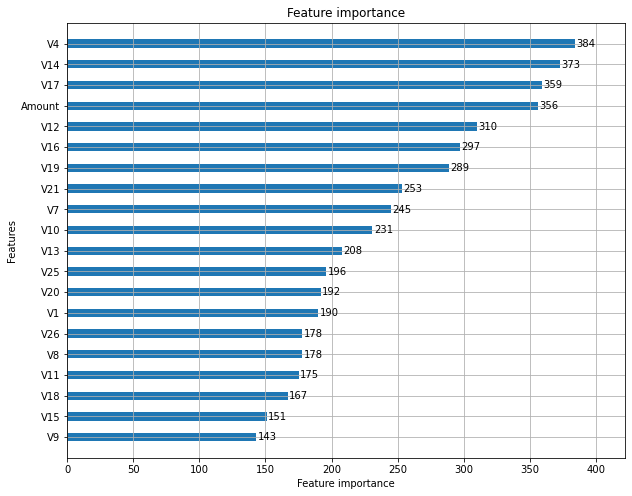

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(lgbm_clf, ax=ax , max_num_features=20,height=0.4)

# 3. SMOTE 샘플링

데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#경로 수정은 자유롭게
card_df = pd.read_csv('/content/drive/MyDrive/creditcard 2.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


성능평가 함수 생성

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

LGBM import 및 모델 학습/예측/평가 함수 생성

In [ ]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)


from lightgbm import LGBMClassifier

데이터 전처리(Time열 제거 및 로그변환)와 V17에 대한 이상치 제거 함수 생성


In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환.
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

outlier_index = get_outlier(df=card_df, column='V17', weight=1.5)

# get_processed_df( )를 로그 변환 후 V17 피처의 이상치 데이터를 삭제하는 로직으로 변경.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy


Stratified 기반의 train_test_split 함수 생성

In [ ]:
from sklearn.model_selection import train_test_split

# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test


# 여기서부터 문제 시작

get_train_test_dataset 함수를 사용해 데이터 전처리 및 데이터셋 분할을 진행해주세요. (5점)

In [ ]:
#get_train_test_dataset 함수를 실행하면 자동으로 get_preprocessed와 get_outlier 함수도 실행됨
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

SMOTE 샘플링을 진행해주세요. (5점)

In [ ]:
#SMOTE를 사용해 X_trainrhk y_train을 각각 X_train_over, y_train_over로 변환
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

LightGBM을 활용하여 학습/예측/평가를 진행해주세요. (5점)

In [ ]:
#get_model_train_eval 함수를 실행하면 자동으로 get_clf_eval 함수도 실행됨

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.366524 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

# 4번  
# 스태킹 앙상블

아래 코드를 실행시켜주세요.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=11)

2-(1) 개별적인 학습 모델로 결정트리, KNN, lgbm을 사용할 것입니다.(하이퍼 파라미터는 자유롭게 사용해주세요.) 각각의 classifier를 생성해주고 학습 및 예측 시켜 주세요.

In [ ]:
#모델 생성
knn_clf  =  KNeighborsClassifier(n_neighbors=4)
dt_clf = DecisionTreeClassifier()
lgbm_wrapper = LGBMClassifier(n_estimators=400)

#학습
knn_clf.fit(X_train, y_train)
dt_clf.fit(X_train , y_train)
evals = [(X_train , y_train)]
lgbm_wrapper.fit(X_train , y_train, early_stopping_rounds=100, eval_metric="logloss",
                 eval_set=evals, verbose=True)

#예측
knn_pred = knn_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
lgbm_preds = lgbm_wrapper.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's multi_logloss: 0.948038
[2]	training's multi_logloss: 0.828766
[3]	training's multi_logloss: 0.731556
[4]	training's multi_logloss: 0.650936
[5]	training's multi_logloss: 0.569472
[6]	training's multi_logloss: 0.50197
[7]	training's multi_logloss: 0.445537
[8]	training's multi_logloss: 0.397521
[9]	training's multi_logloss: 0.355984
[10]	training's multi_logloss: 0.320132
[11]	training's multi_logloss: 0.289237
[12]	training's multi_logloss: 0.262253
[13]	training's multi_logloss: 0.238707
[14]	training's multi_logloss: 0.218058
[15]	training's multi_logloss: 0.199873
[16]	training's multi_logloss: 0.184006
[17]	training's multi_logloss: 0.169712
[18]	training's multi_logloss: 0.156908
[19]	training's multi_logloss: 0.145772
[20]	training's multi_logloss: 0.135132
[21]	training's multi_logloss: 0.124422
[22]	training's multi_logloss: 0.115312
[23]	training's multi_logloss: 0.107416
[24]	training's multi_logloss: 0.100255
[25]	training's multi_logloss: 0.0939042
[26]	trai

[214]	training's multi_logloss: 4.0203e-05
[215]	training's multi_logloss: 3.97309e-05
[216]	training's multi_logloss: 3.93001e-05
[217]	training's multi_logloss: 3.89003e-05
[218]	training's multi_logloss: 3.77693e-05
[219]	training's multi_logloss: 3.74123e-05
[220]	training's multi_logloss: 3.60256e-05
[221]	training's multi_logloss: 3.49902e-05
[222]	training's multi_logloss: 3.4648e-05
[223]	training's multi_logloss: 3.433e-05
[224]	training's multi_logloss: 3.40363e-05
[225]	training's multi_logloss: 3.3227e-05
[226]	training's multi_logloss: 3.28582e-05
[227]	training's multi_logloss: 3.23505e-05
[228]	training's multi_logloss: 3.20233e-05
[229]	training's multi_logloss: 3.15699e-05
[230]	training's multi_logloss: 3.11054e-05
[231]	training's multi_logloss: 3.07271e-05
[232]	training's multi_logloss: 3.03792e-05
[233]	training's multi_logloss: 3.01503e-05
[234]	training's multi_logloss: 2.98575e-05
[235]	training's multi_logloss: 2.95983e-05
[236]	training's multi_logloss: 2.935

2-(2) 위에서 만든 예측 데이터를 열 형태로 병합하여 최종메타모델인 랜덤포레스트에 학습시켜 정확도를 출력해주세요.

In [ ]:
pred = np.array([knn_pred, dt_pred, lgbm_preds])
pred = np.transpose(pred)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(pred, y_test)
final = rf_clf.predict(pred)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9333


2-(3) cv세트 기반의 스태킹을 구현할 것입니다. 아래의 함수는 최종 메타 모델이 사용할 학습 및 테스트 데이터를 반환하는 함수인데 "none"에 알맞은 코드를 넣어주세요.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        model.fit(X_tr , y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        test_pred[:, folder_counter] = model.predict(X_test_n)

    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    return train_fold_pred , test_pred_mean

아래 코드를 실행시켜 주세요. (위에서 만든 함수를 각 모델에 적용하는 코드입니다)

In [ ]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 5)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_wrapper, X_train, y_train, X_test, 5)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


2-(4) 앞에서 만든 개별 모델의 예측데이터를 이용하여 최종 메타 모델의 학습, 테스트 데이터를 만들어주세요.

In [ ]:
Stack_final_X_train = np.concatenate((knn_train, dt_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, dt_test, lgbm_test), axis=1)

2-(5) 최종 메타 모델의 학습, 테스트 데이터를 이용해 학습 및 예측을 진행해주세요. (최종 메타 모델은 여전히 랜덤포레스트를 사용합니다.)

In [ ]:
rf_clf.fit(Stack_final_X_train, y_train)
stack_final = rf_clf.predict(Stack_final_X_test)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9333
